In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
files = ["1em11_interference.csv","1em12_interference.csv","1em11_pureAQGC.csv", "1em12_pureAQGC.csv","pureSM.csv"]

In [364]:
def graph_error(info):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".")

In [365]:
def graph_files(files, column):
    for file in files:
        #clean-up
        data_temp = pd.read_csv(file, delimiter=" ")
        data = data_temp.dropna()
        info_temp = data[column]
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        title = file.split(".")[0]
        plt.hist(info, bins=25, label=title+" w/ mean: "+str(round(info.mean(),3)), density = True)
        graph_error(info)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [366]:
def graph_data(datas, column):
    for data in datas:
        #clean-up
        title = data
        info_temp = datas[data].dropna()
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        plt.hist(info, bins=25, label=title+" w/ mean: "+ str(round(info.mean(),3)), density = True)
        graph_error(info)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

0.071282 2595


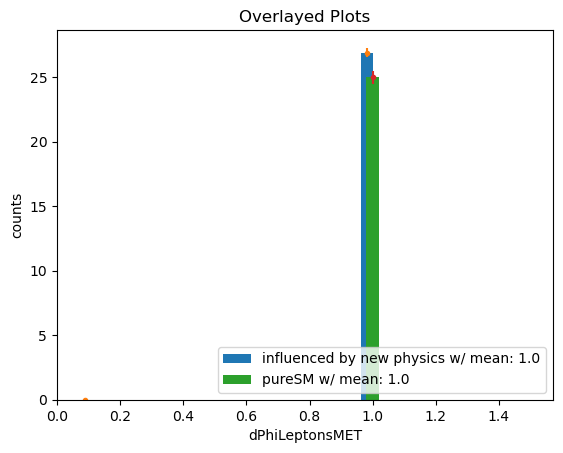

In [367]:
#testing
inter_data = pd.read_csv("1em12_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em12_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

inter = inter_data["is3lepton"]
pureBSM = pureBSM_data["is3lepton"]
pureSM = pureSM_data["is3lepton"]

new = pd.concat([inter, pureBSM])

for i, each in enumerate(inter):
    if each != 1:
        print(each, i)

#graph_files(["1em12_interference.csv","1em12_pureAQGC.csv"], "is3lepton")
datas = {"influenced by new physics": new, "pureSM":pureSM}
graph_data(datas, col)

In [368]:
cols = []
allcols = pd.read_csv(files[0], delimiter=" ").columns
name = allcols[1]
index = 1
while name != "w_Default":
    cols.append(name)
    name = allcols[index]
    index+=1

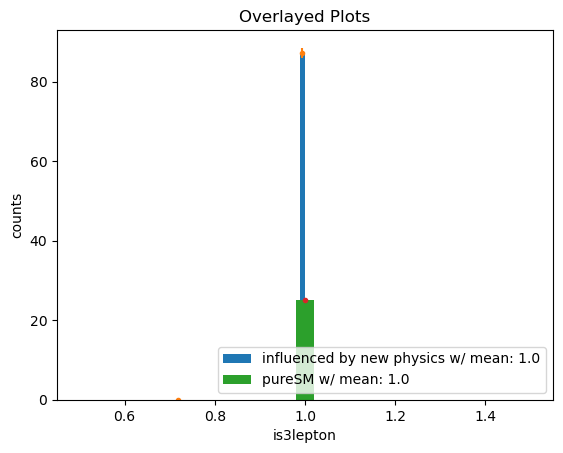

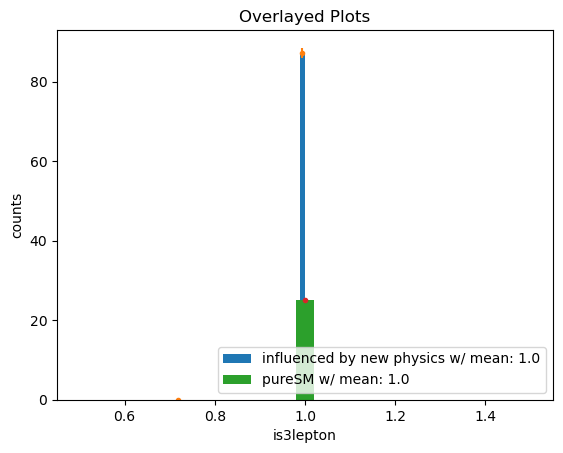

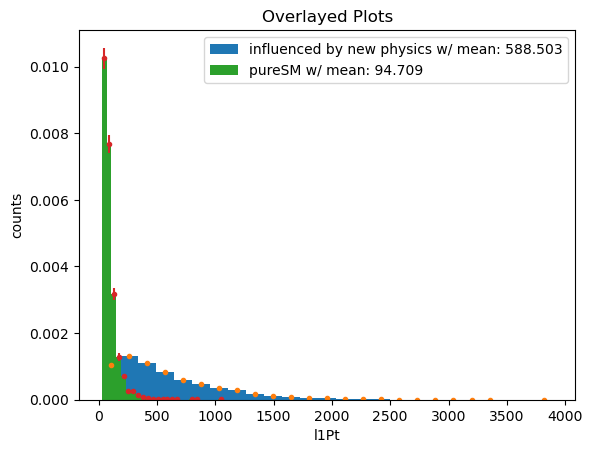

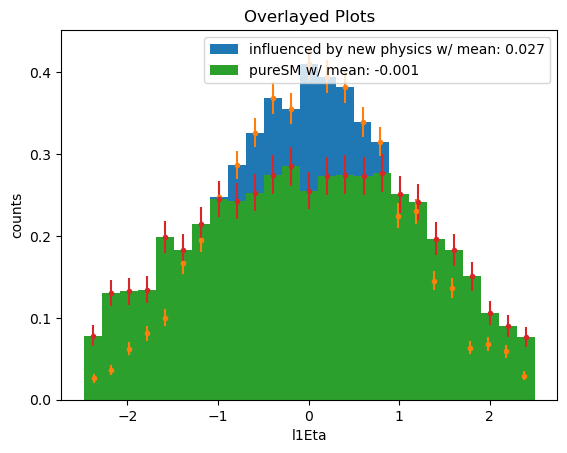

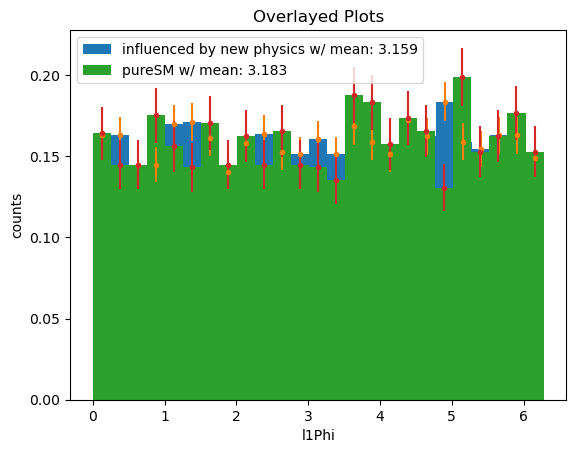

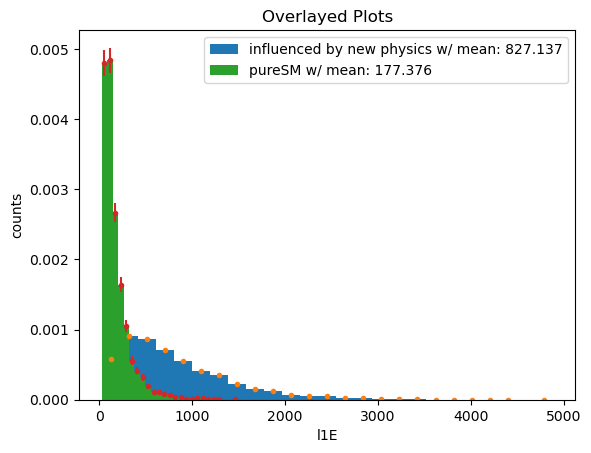

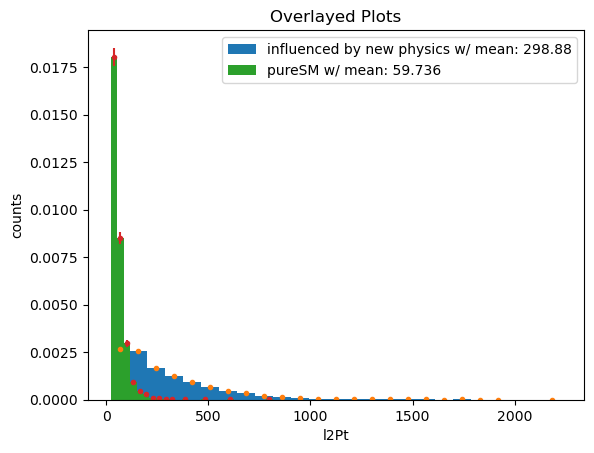

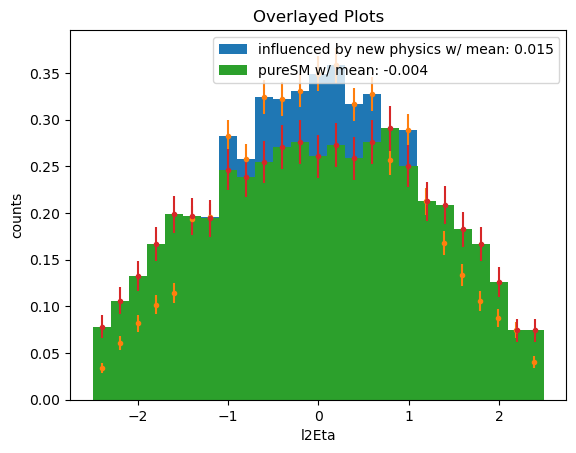

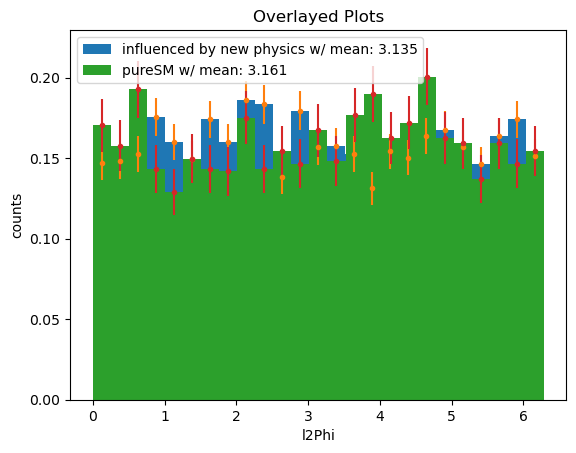

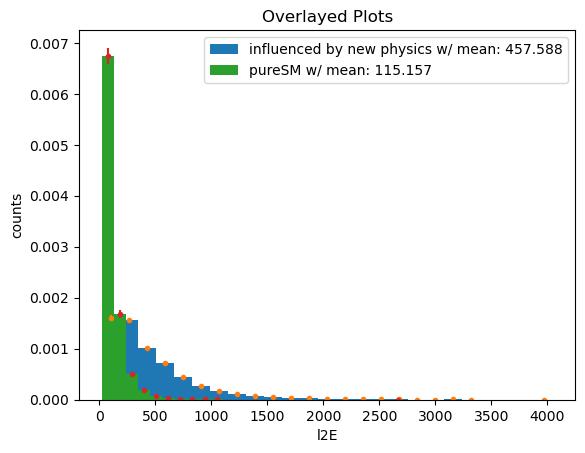

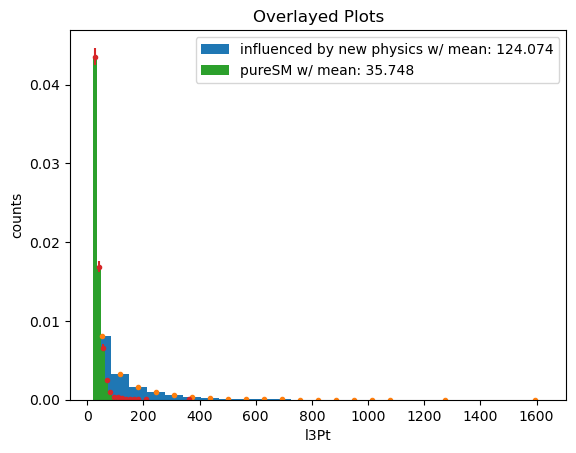

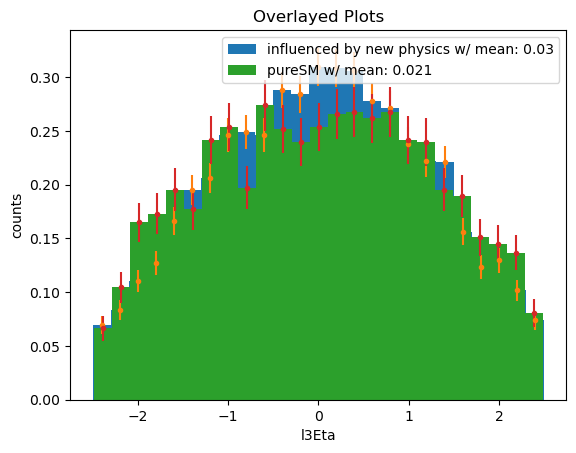

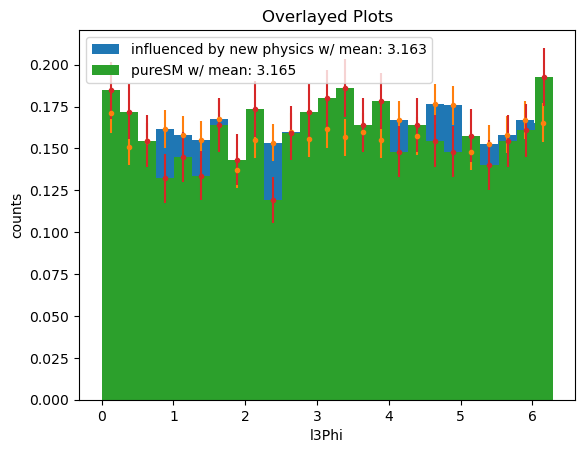

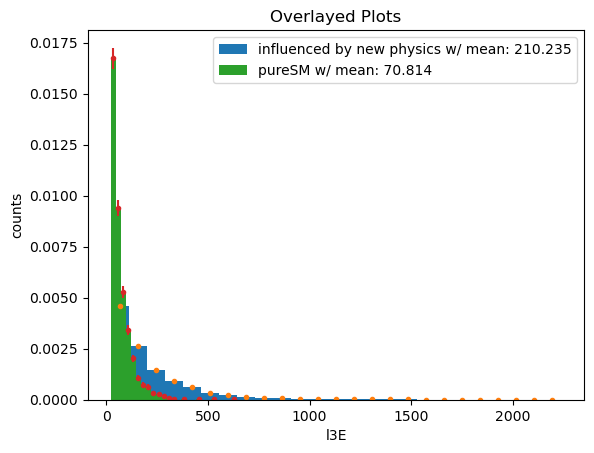

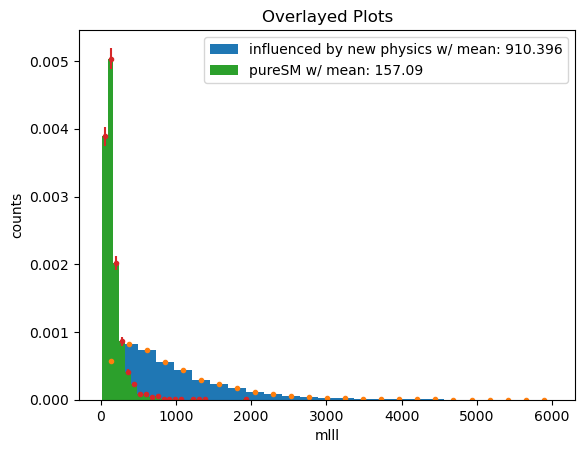

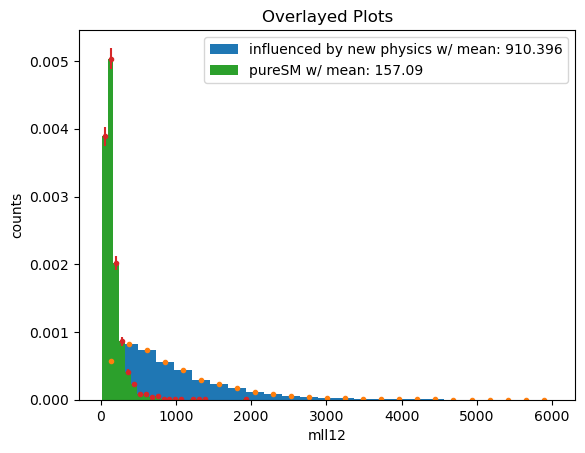

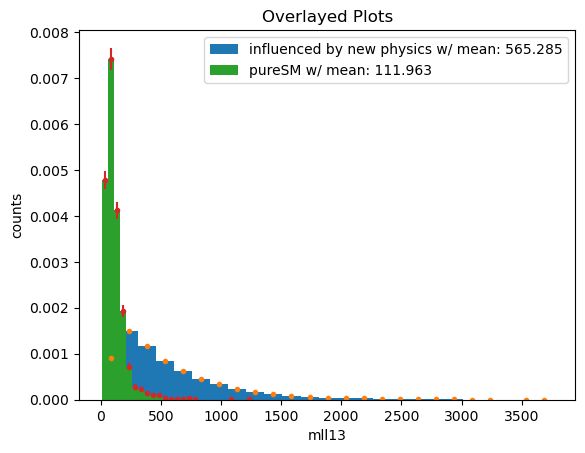

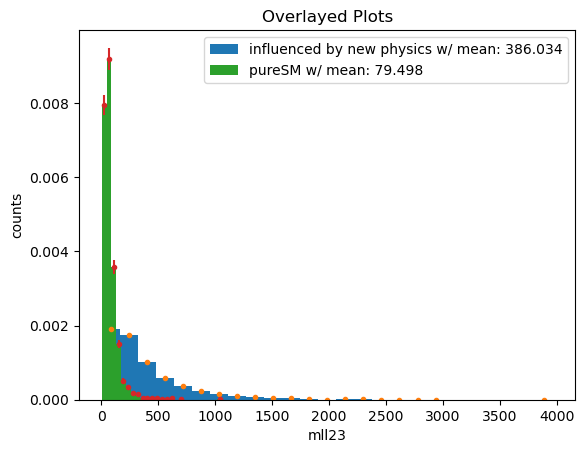

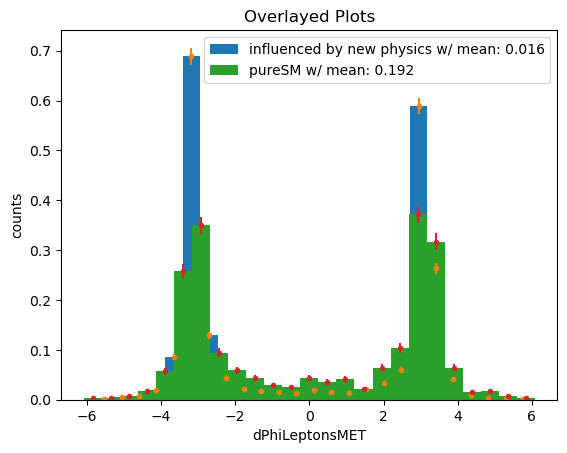

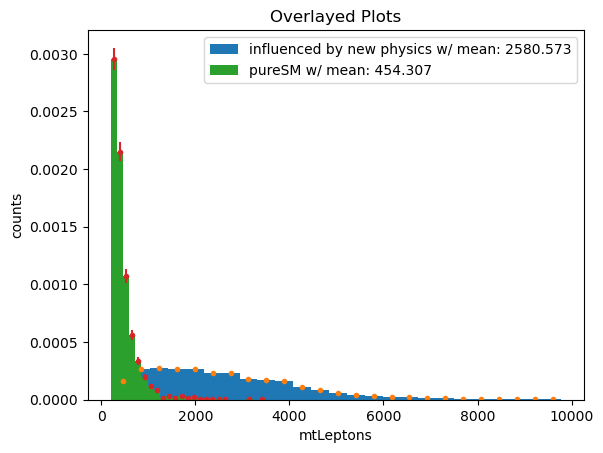

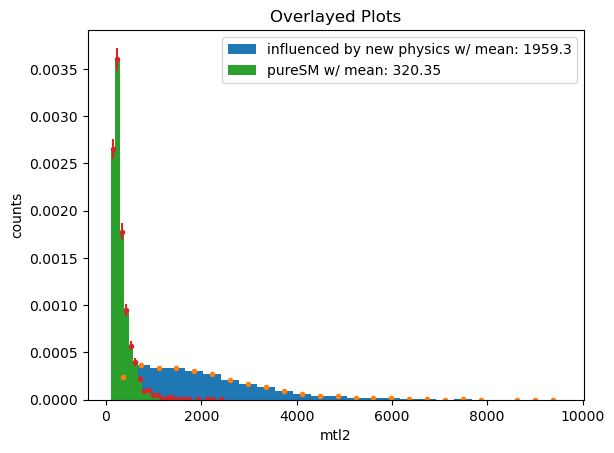

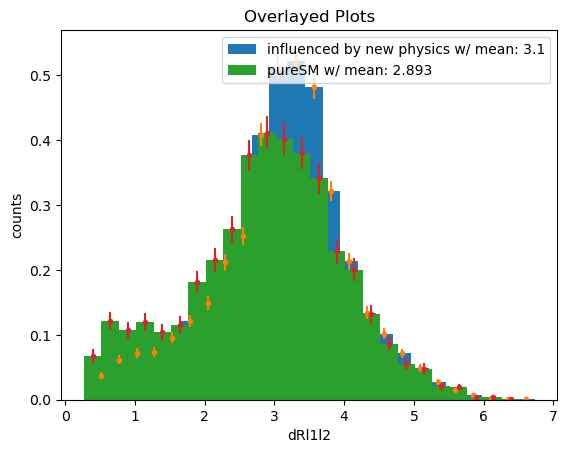

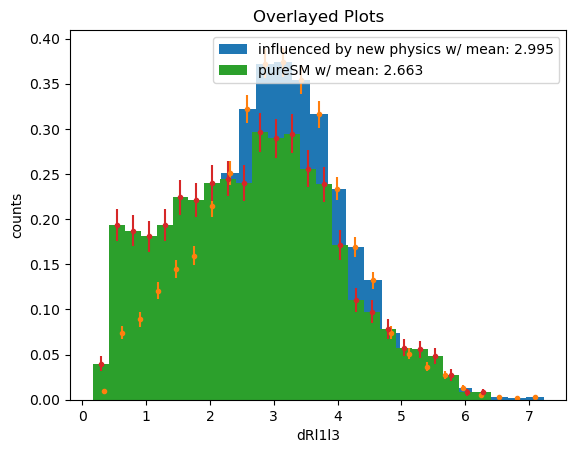

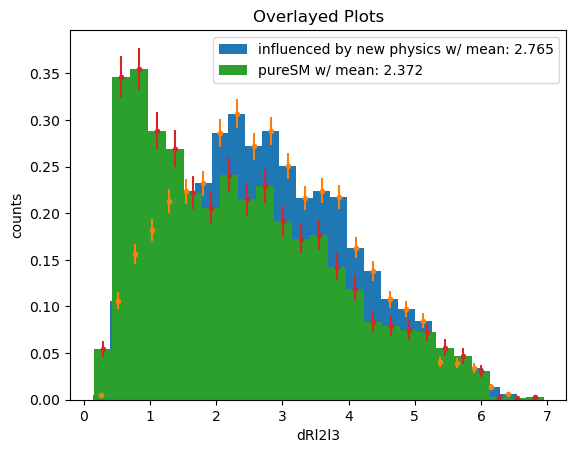

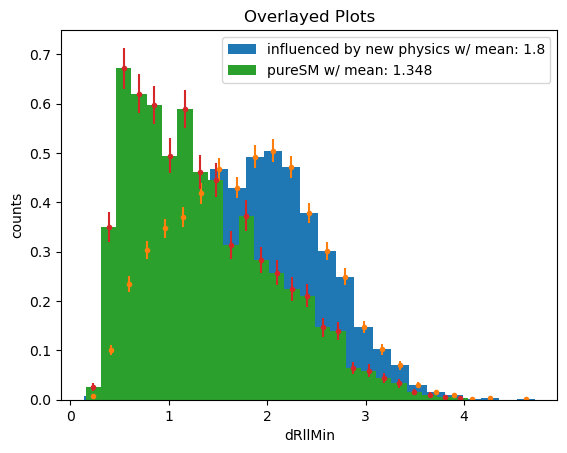

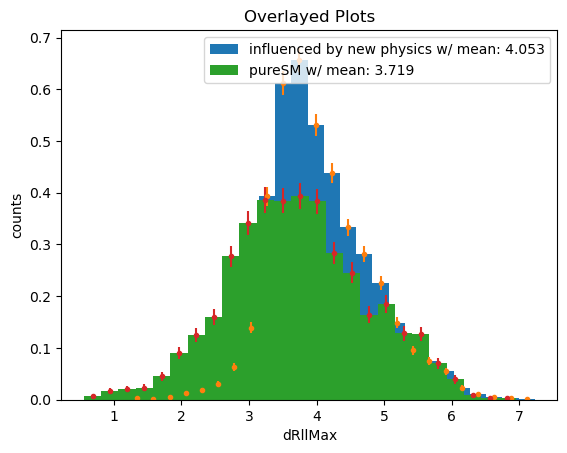

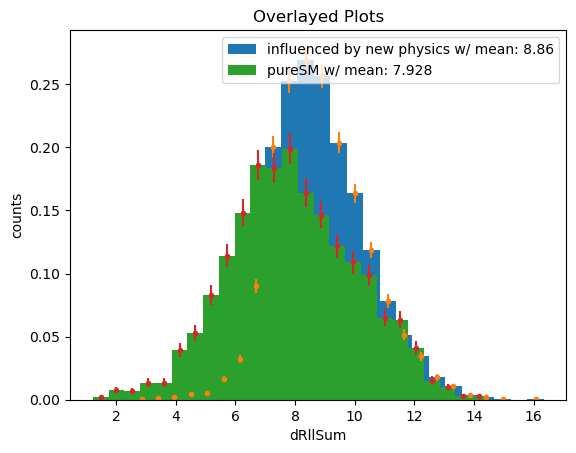

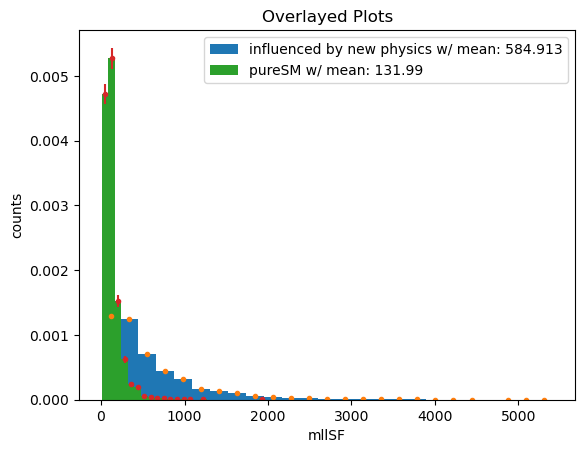

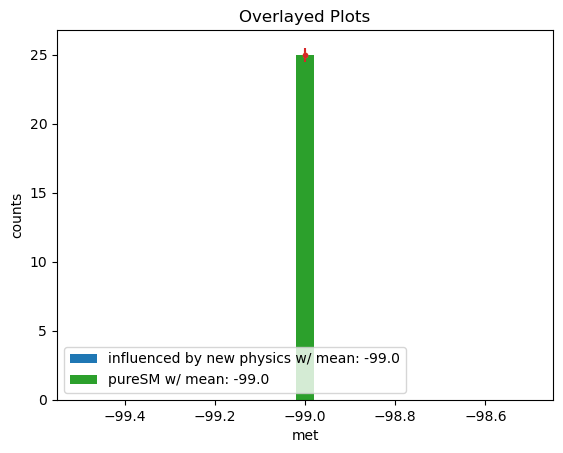

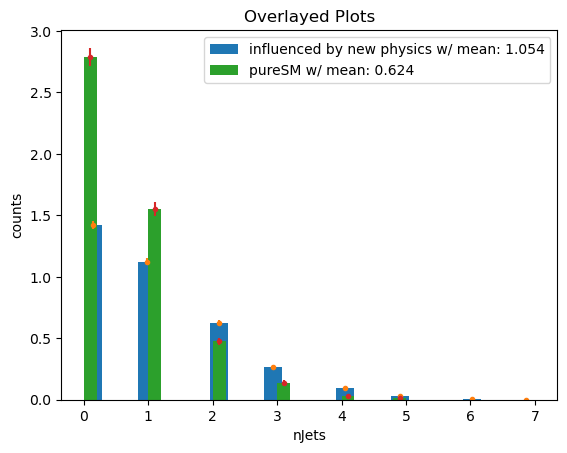

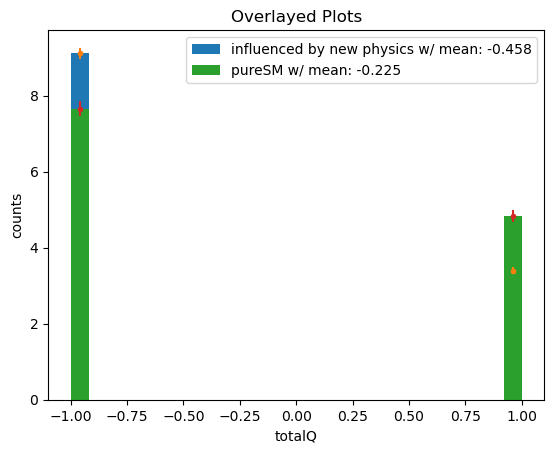

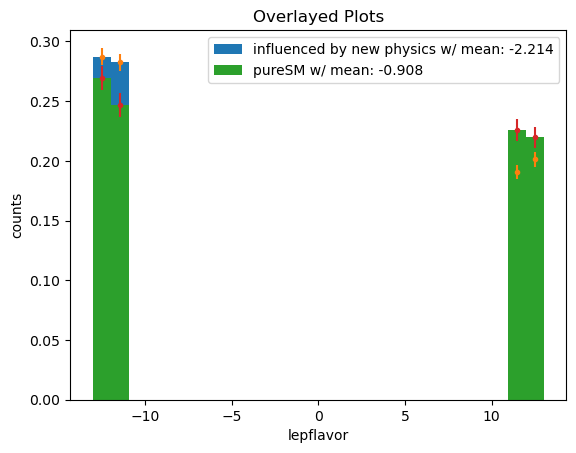

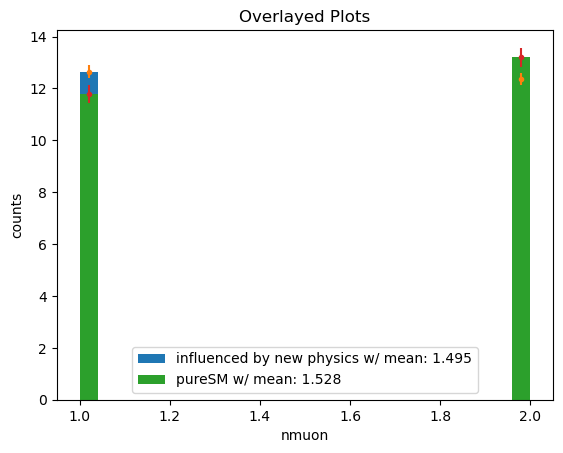

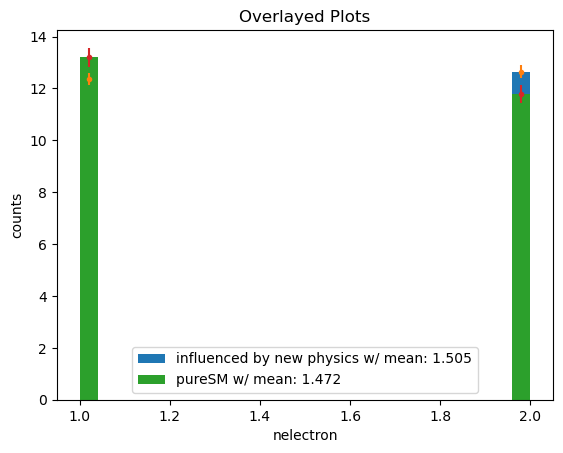

In [369]:
#sm and 1em11
inter_data = pd.read_csv("1em11_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em11_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

for col in cols:
    inter = inter_data[col]
    pureBSM = pureBSM_data[col]
    pureSM = pureSM_data[col]
    
    new = pd.concat([inter, pureBSM])
    datas = {"influenced by new physics": new, "pureSM":pureSM}
    graph_data(datas, col)

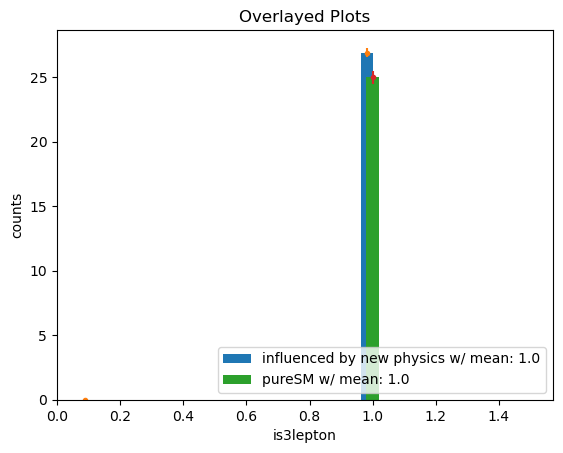

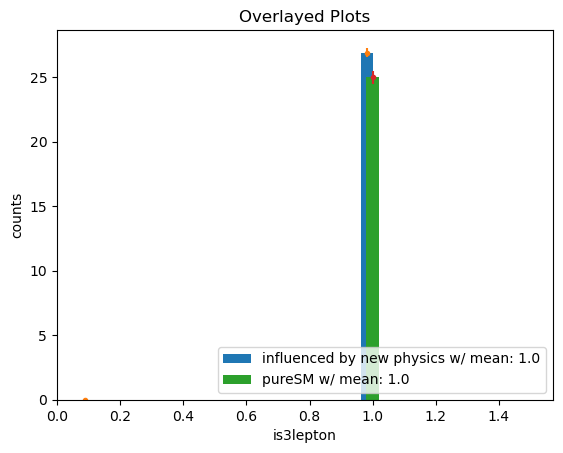

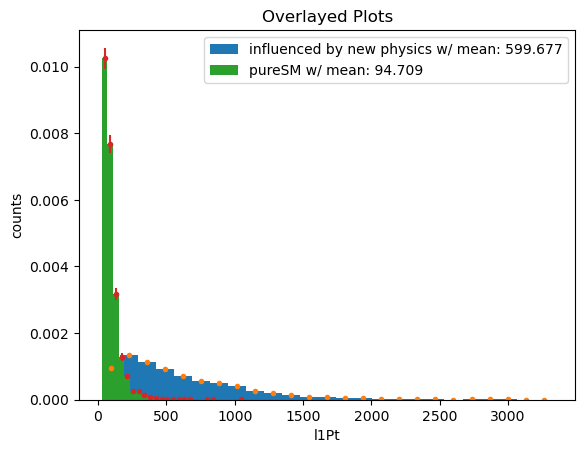

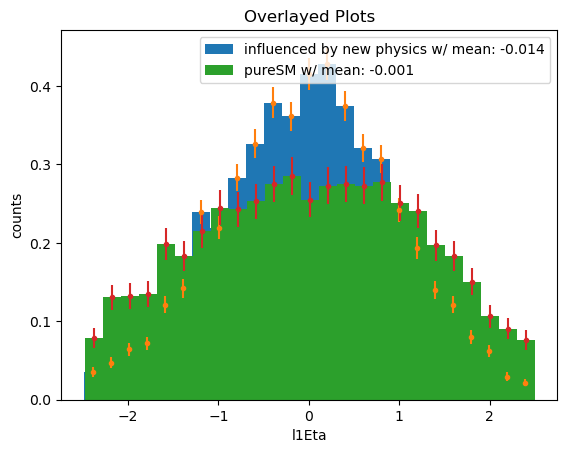

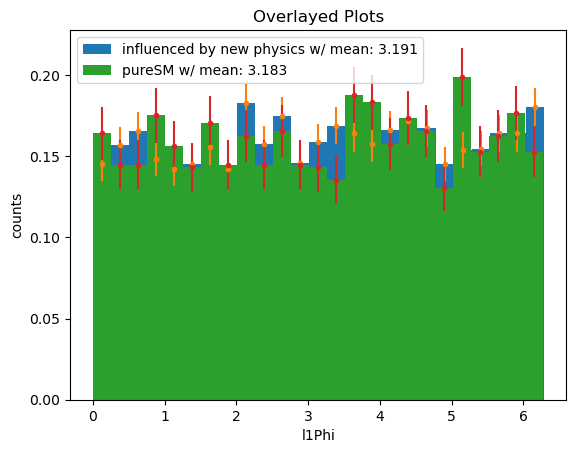

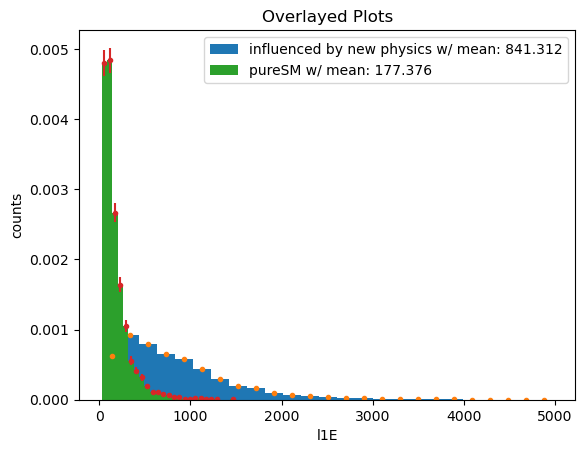

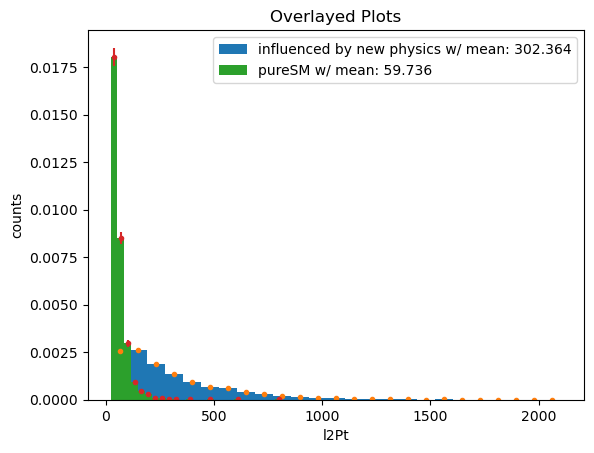

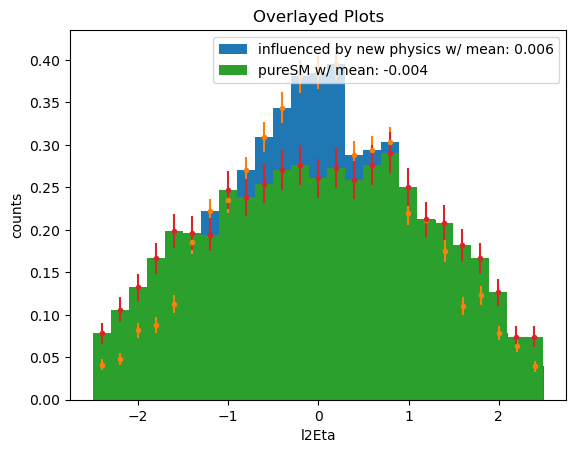

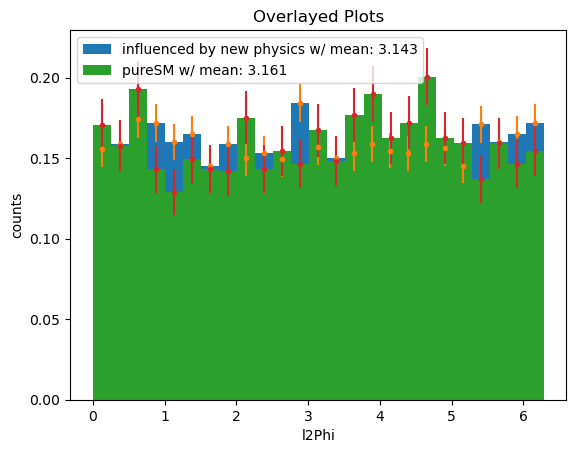

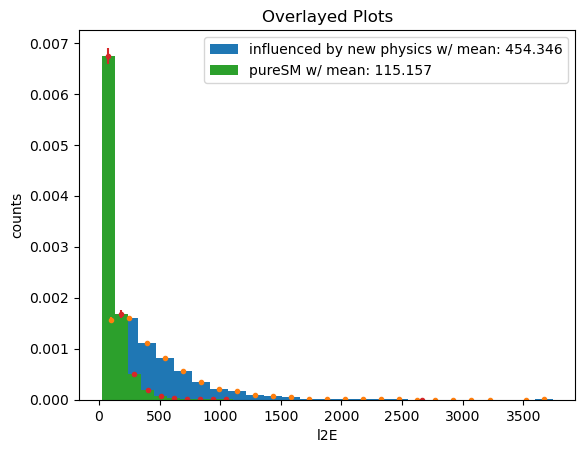

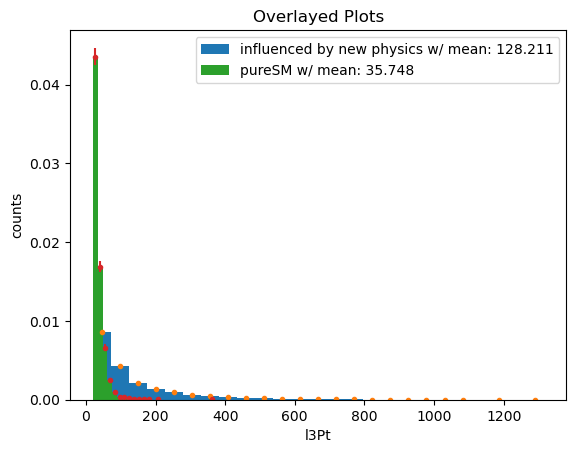

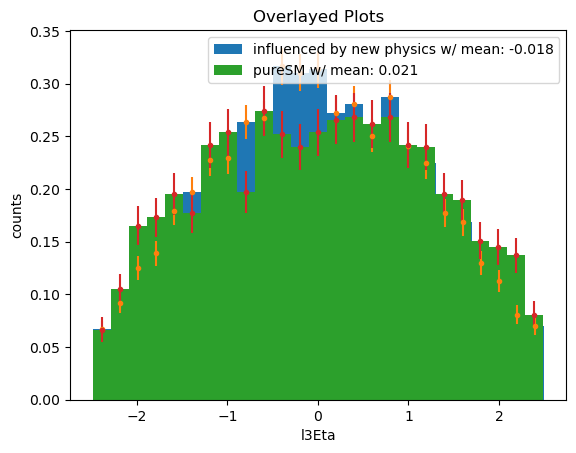

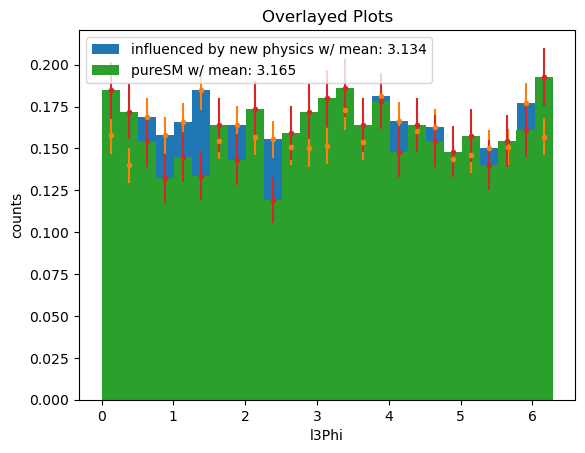

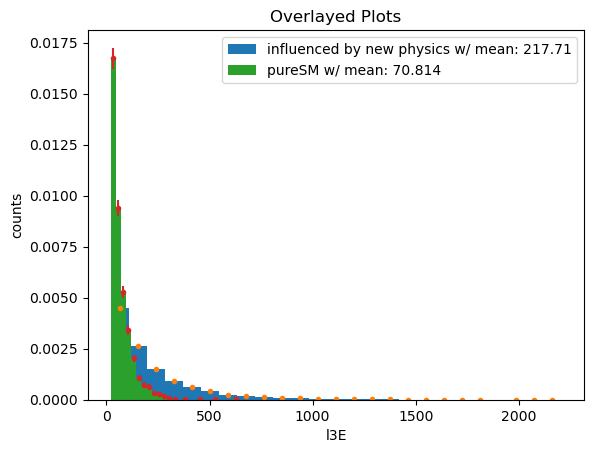

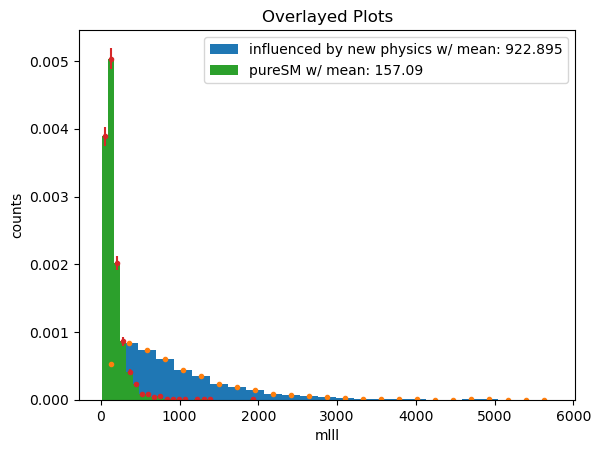

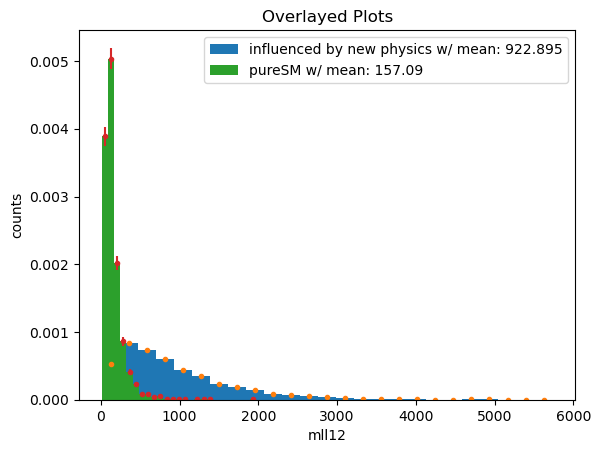

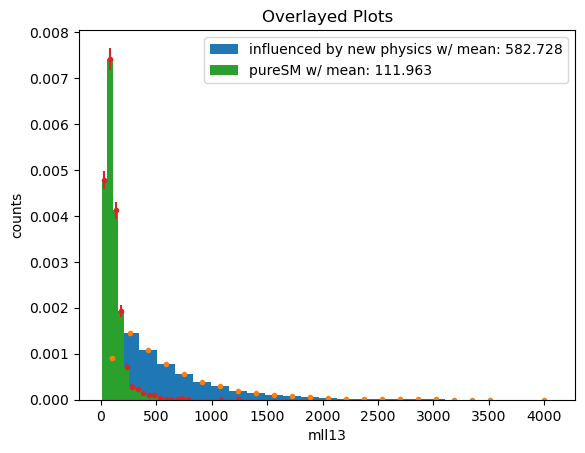

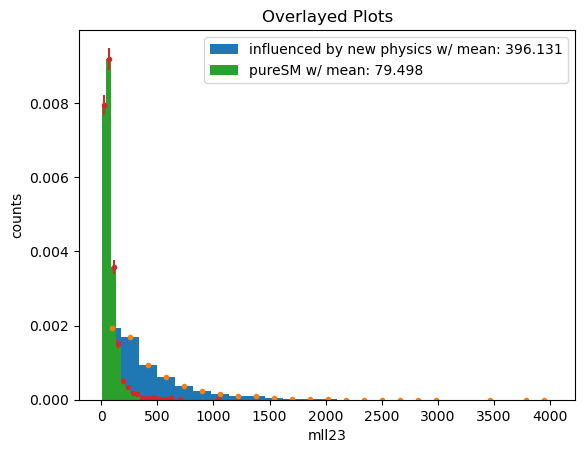

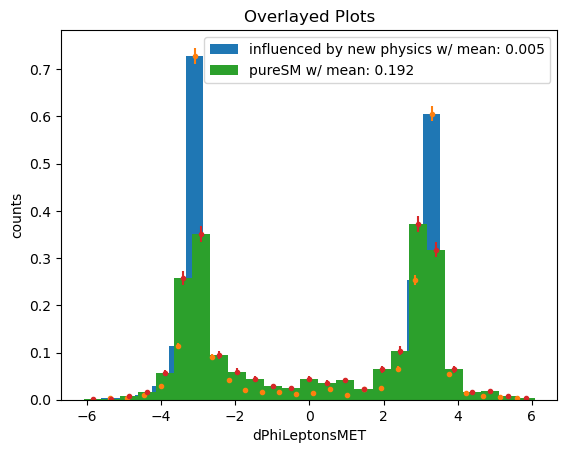

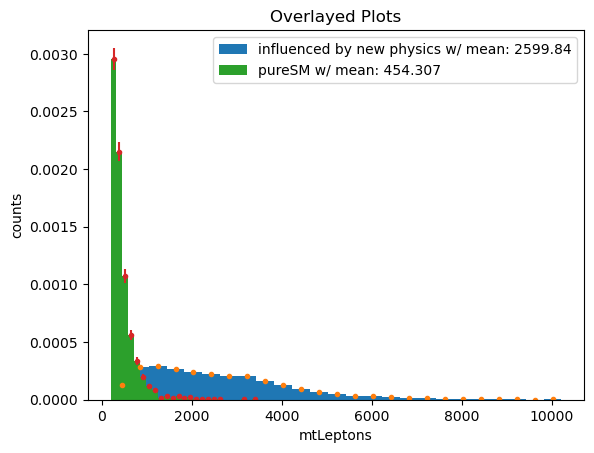

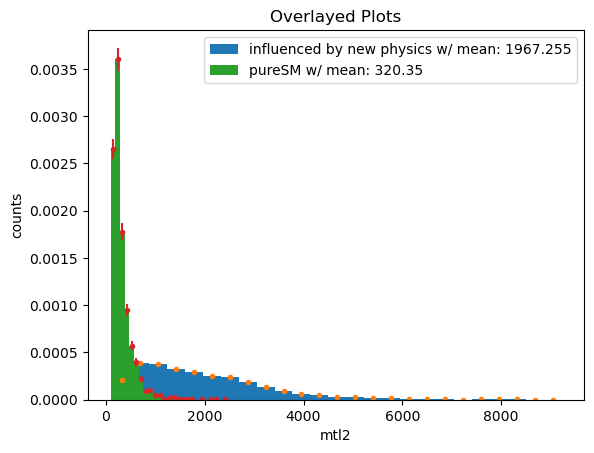

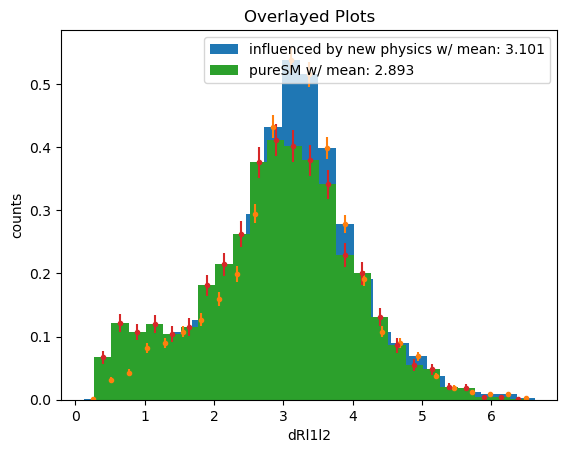

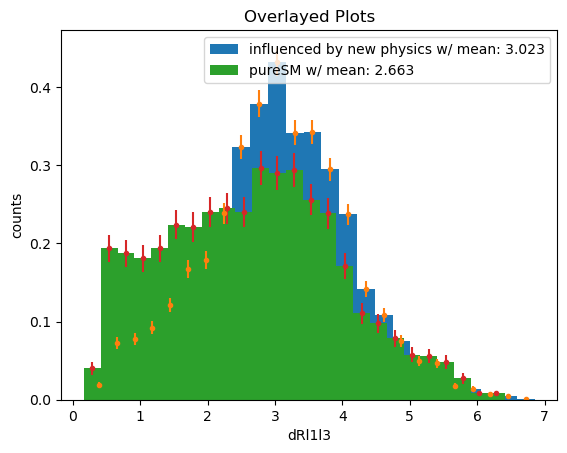

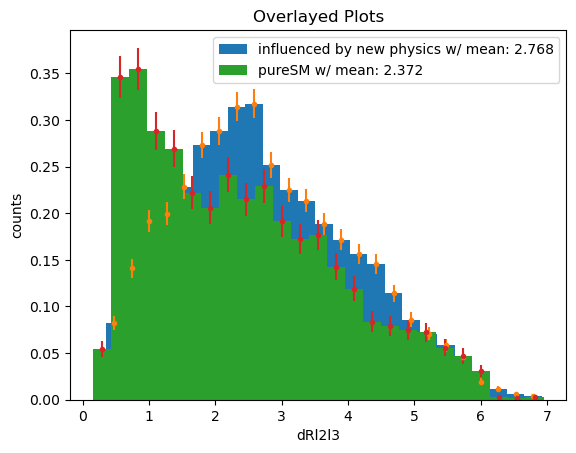

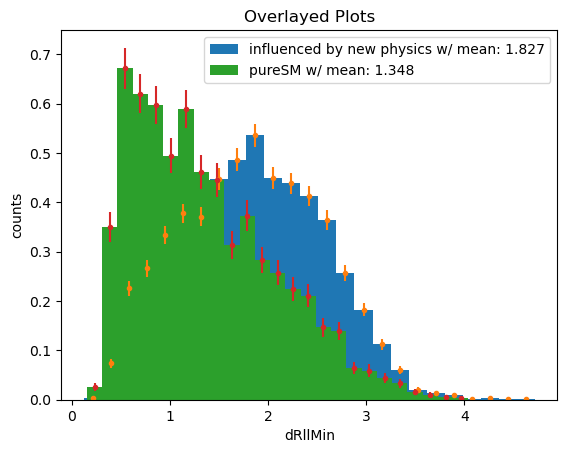

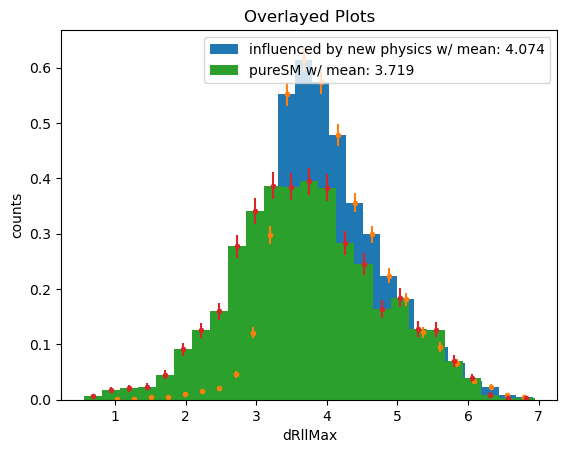

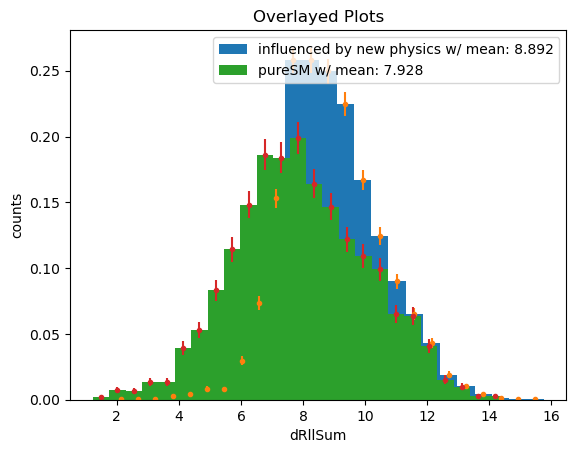

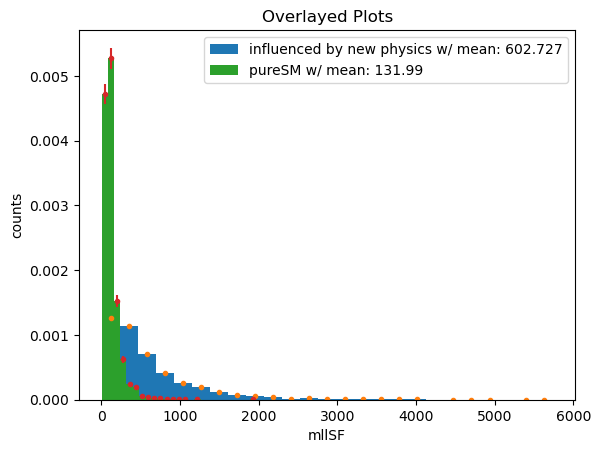

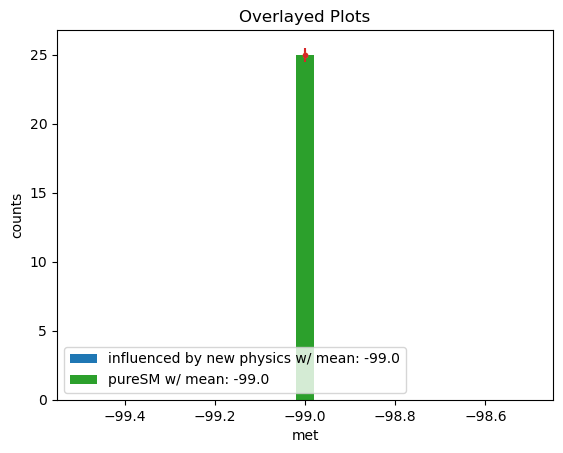

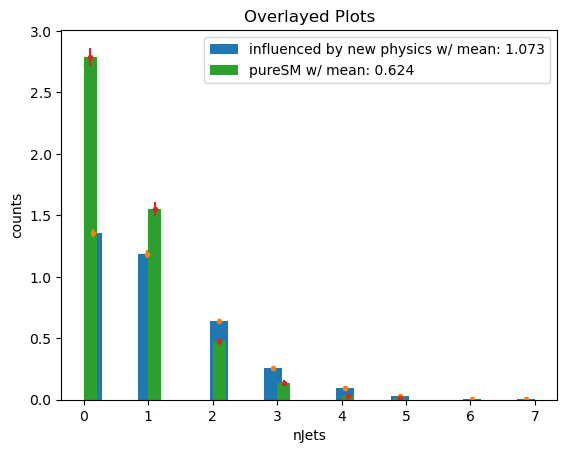

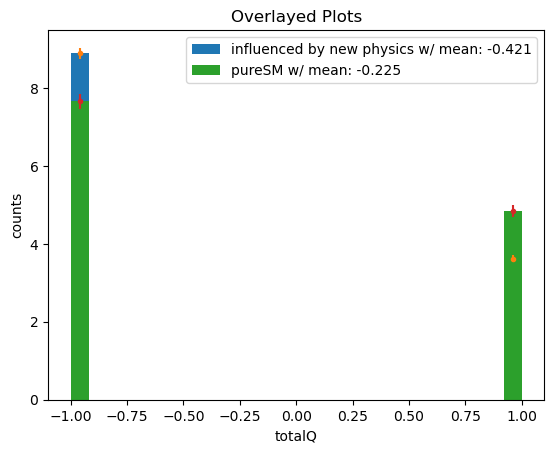

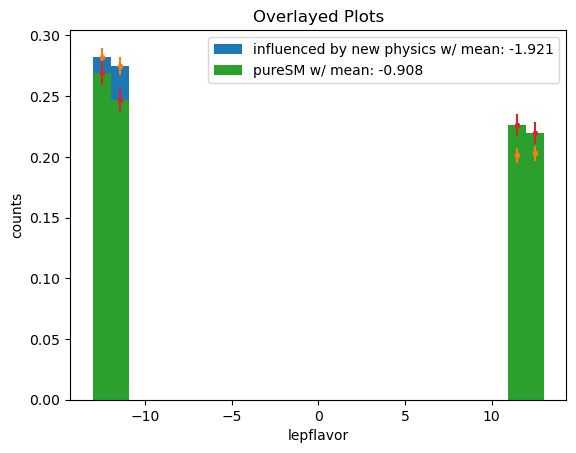

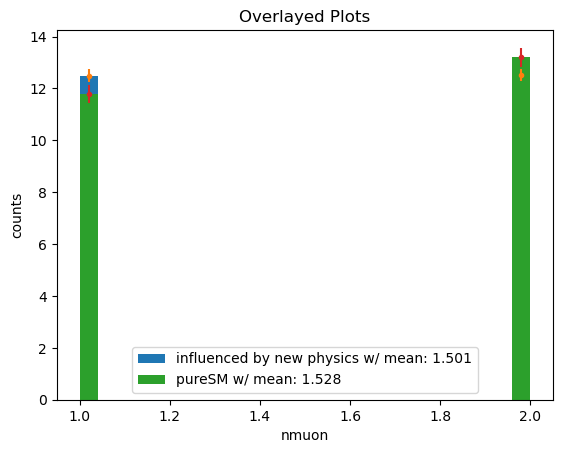

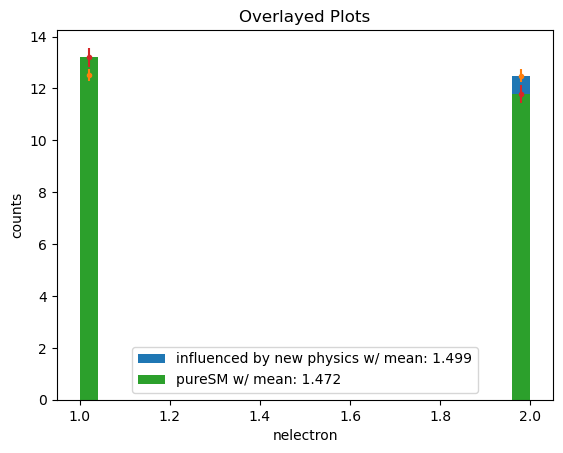

In [370]:
#sm and 1em12
inter_data = pd.read_csv("1em12_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em12_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

for col in cols:
    inter = inter_data[col]
    pureBSM = pureBSM_data[col]
    pureSM = pureSM_data[col]
    
    new = pd.concat([inter, pureBSM])
    datas = {"influenced by new physics": new, "pureSM":pureSM}
    graph_data(datas, col)

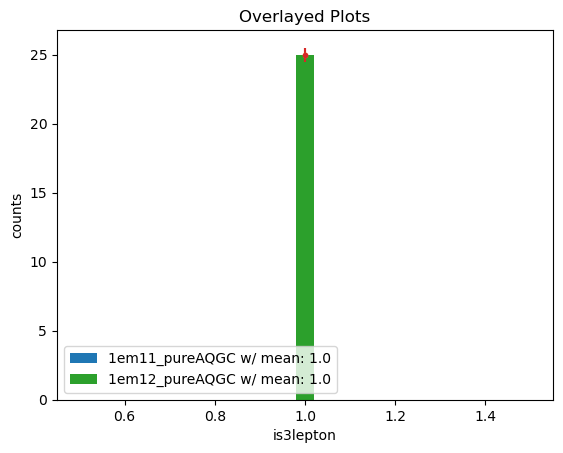

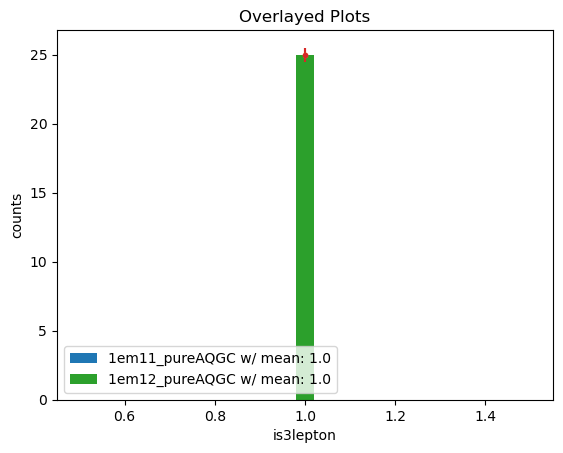

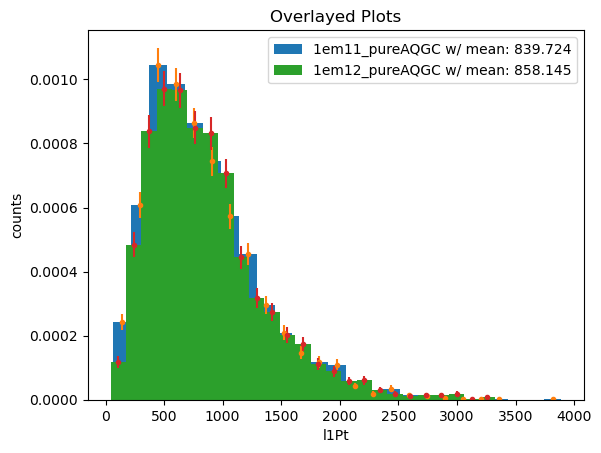

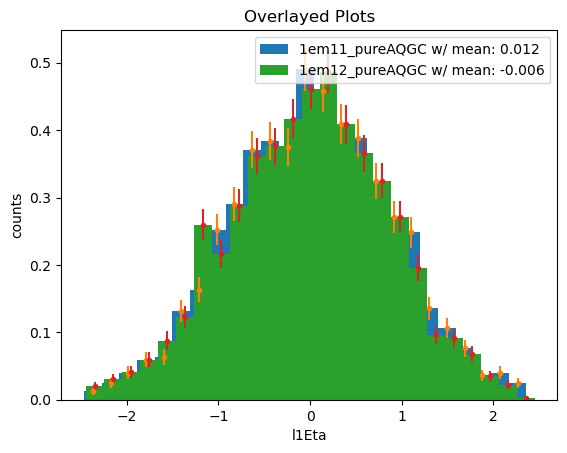

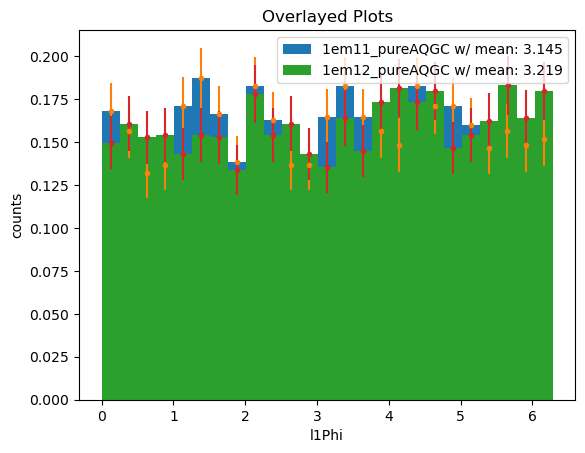

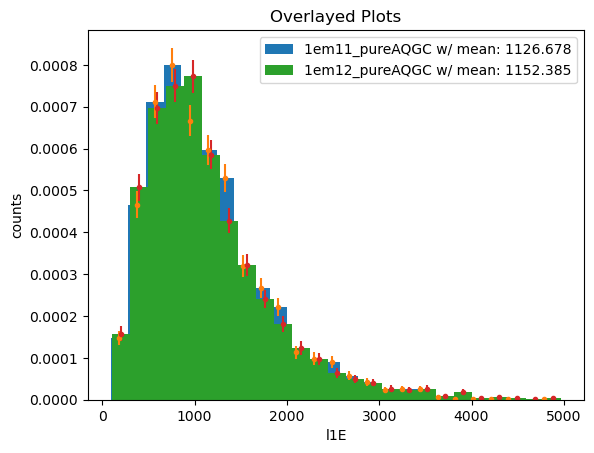

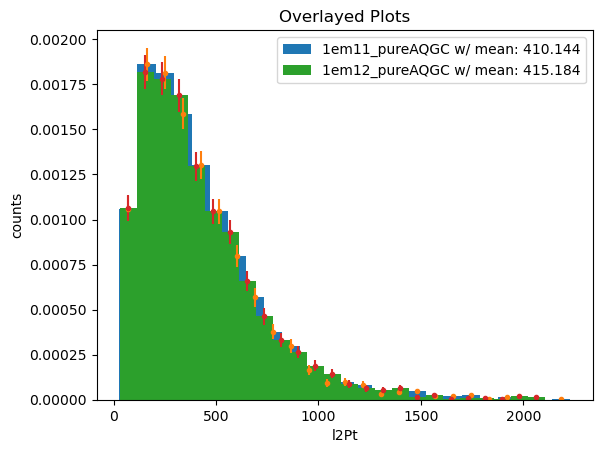

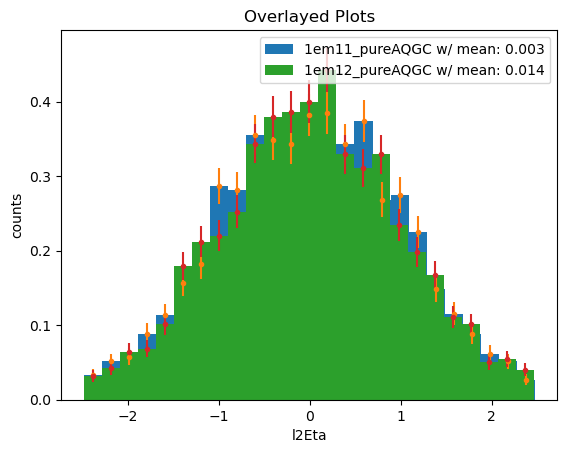

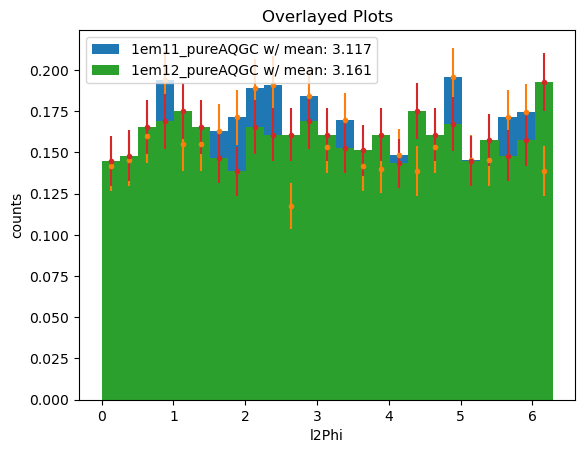

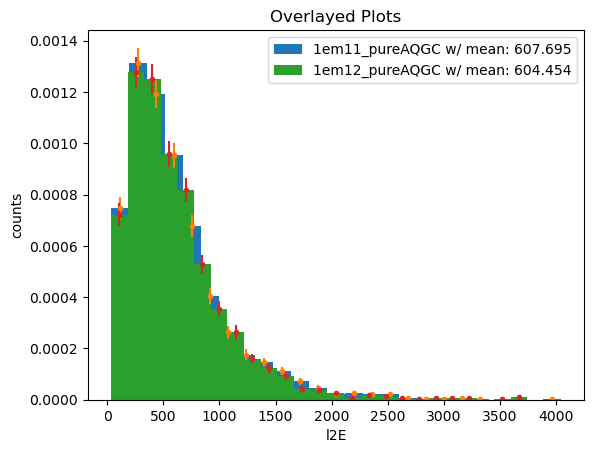

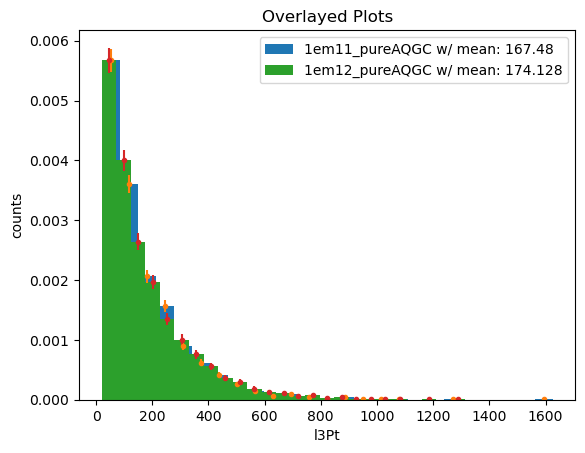

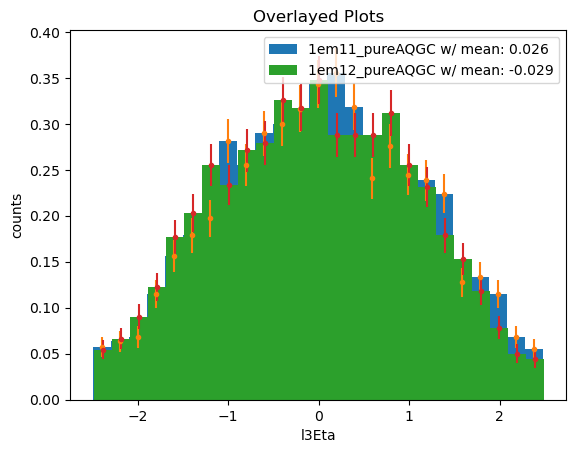

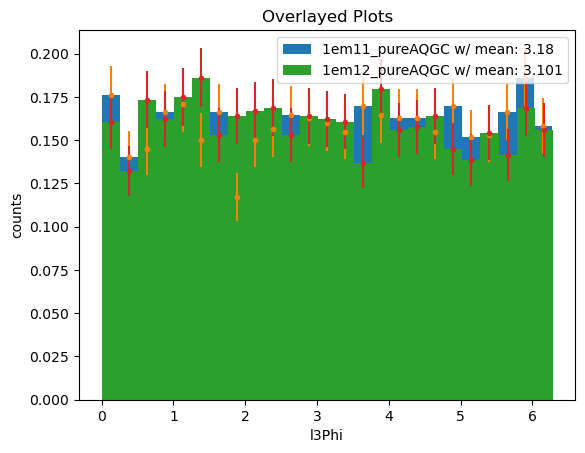

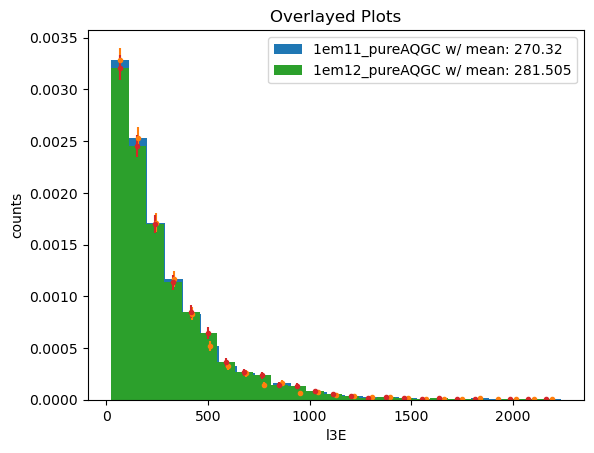

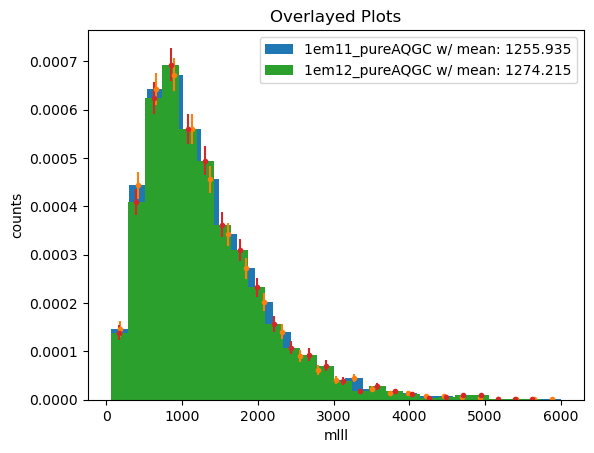

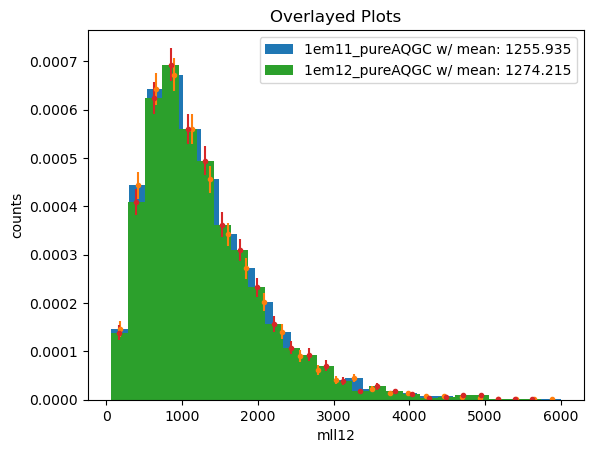

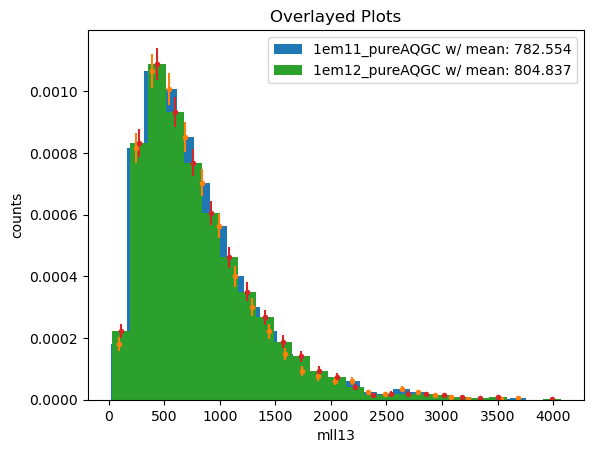

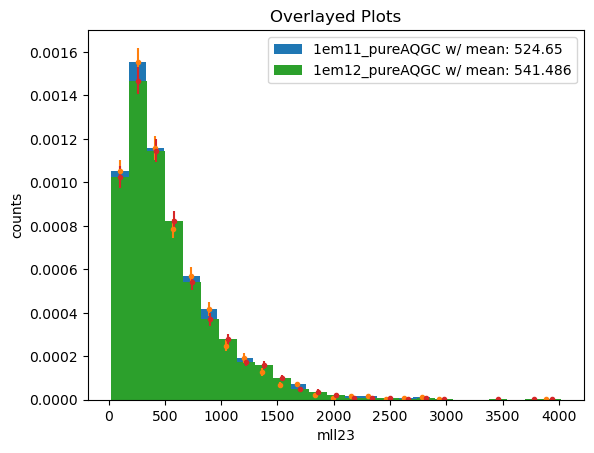

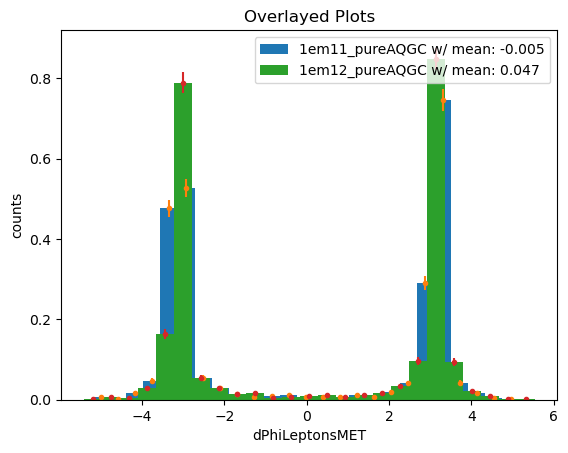

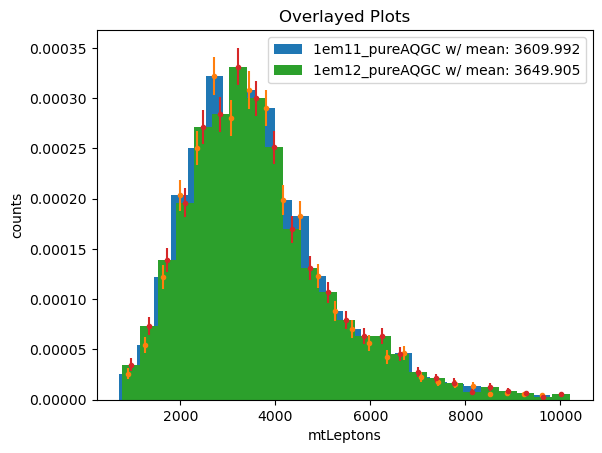

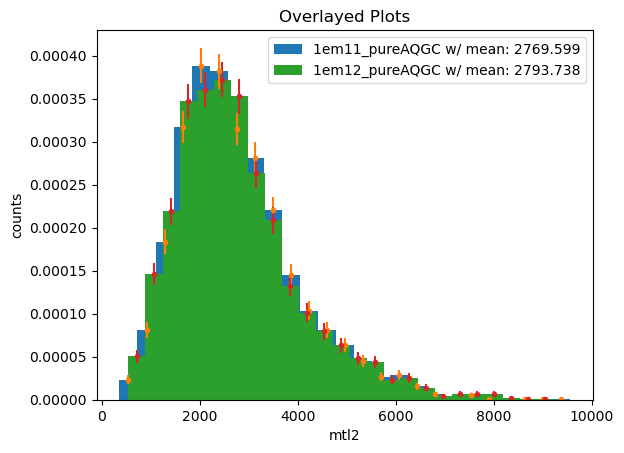

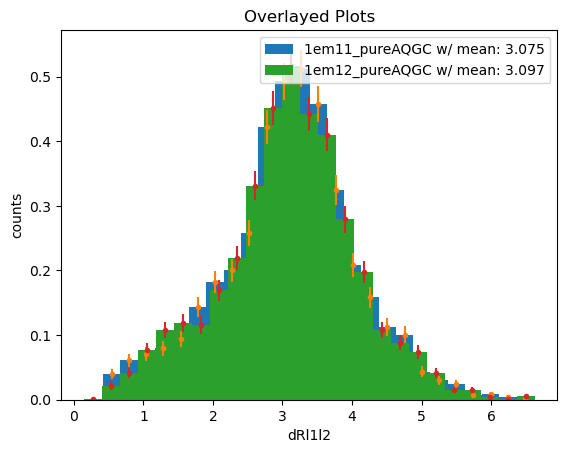

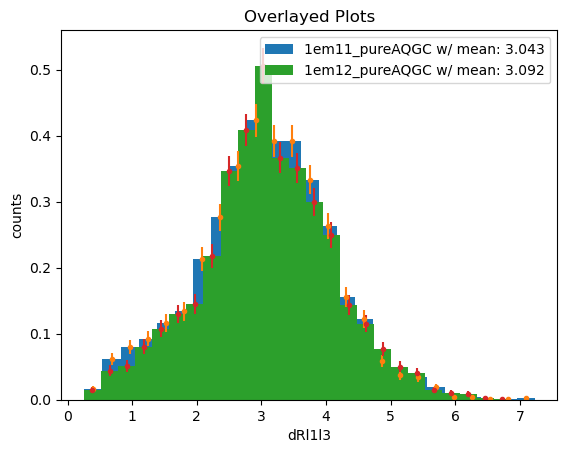

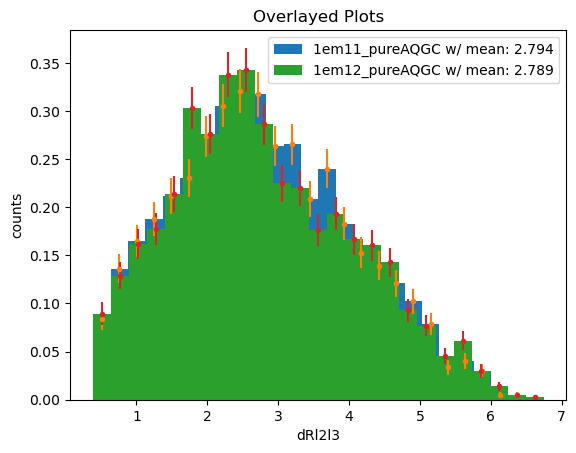

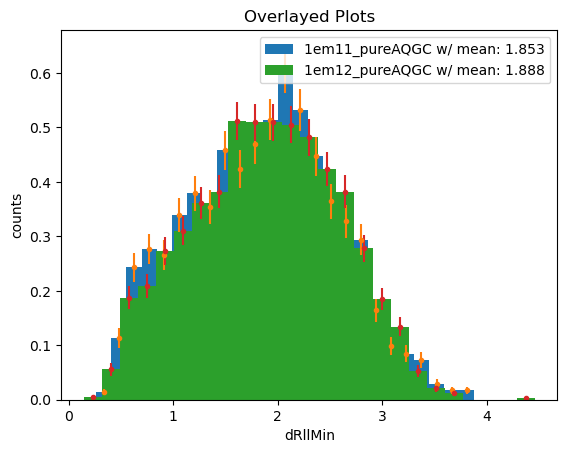

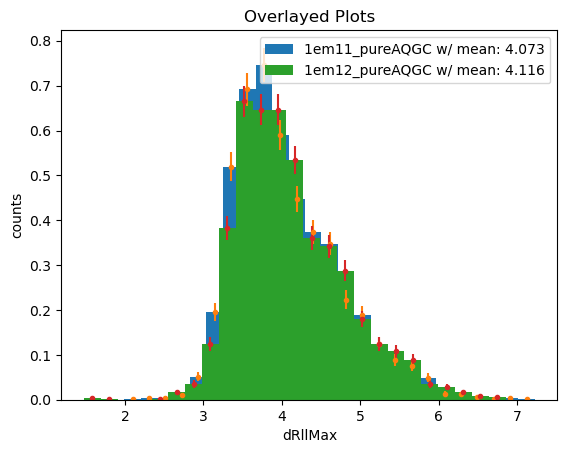

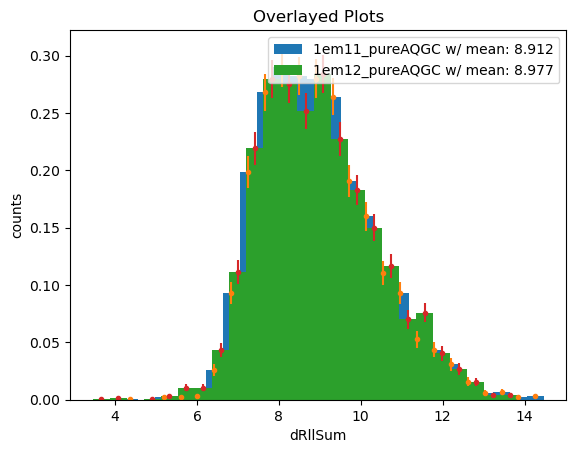

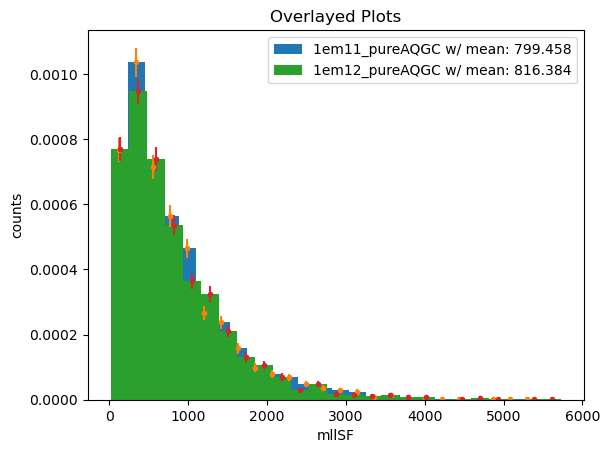

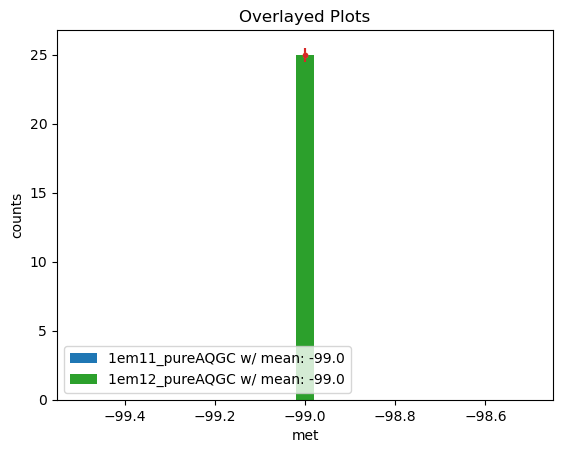

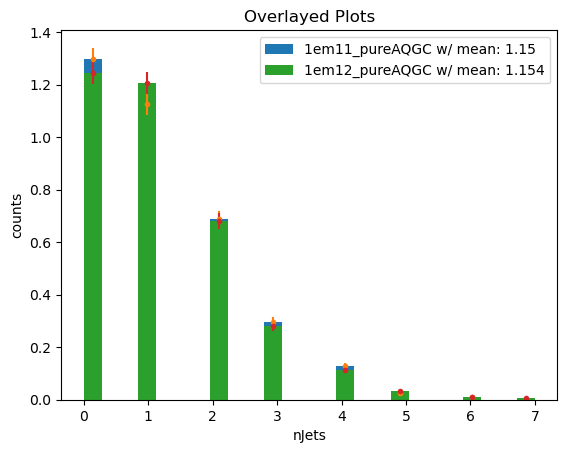

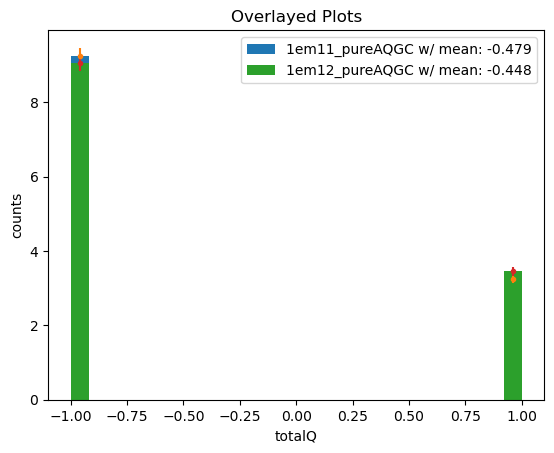

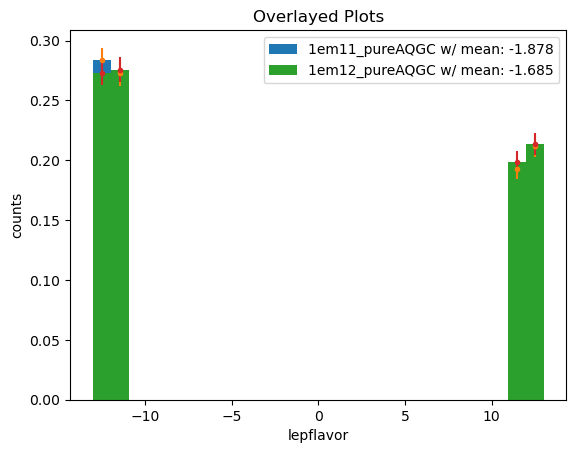

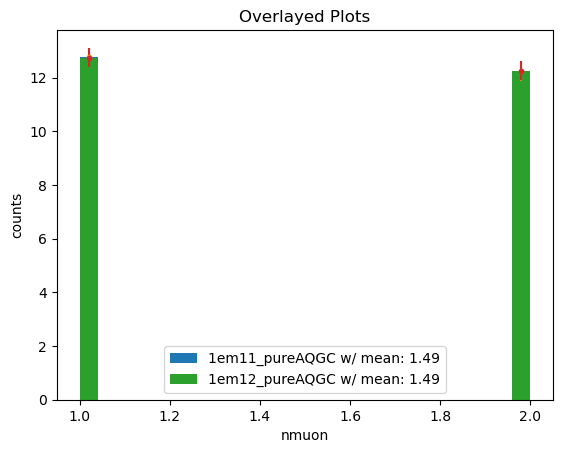

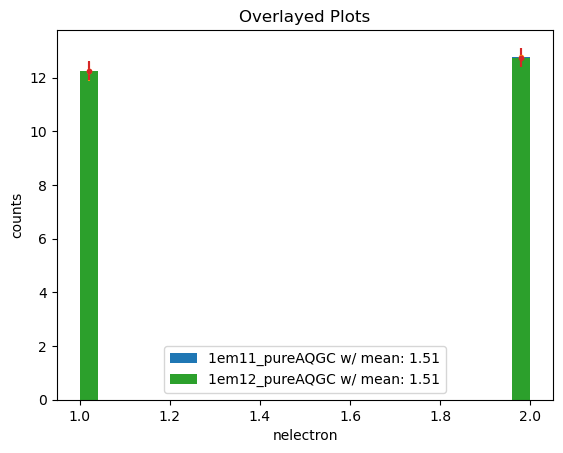

In [371]:
#pure aQGC (comparing 1em11 and 1em12)
for col in cols:
    files = ["1em11_pureAQGC.csv", "1em12_pureAQGC.csv"]
    graph_files(files, col)

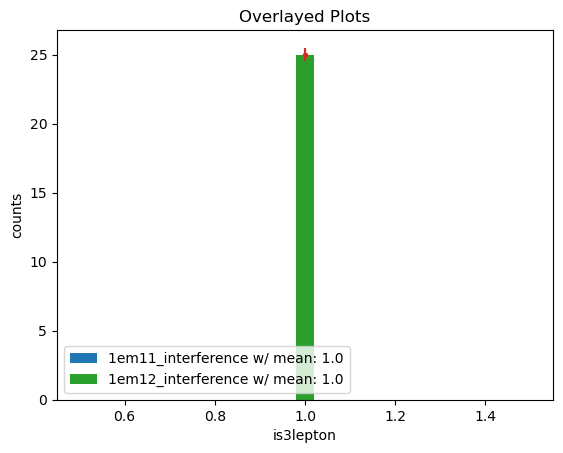

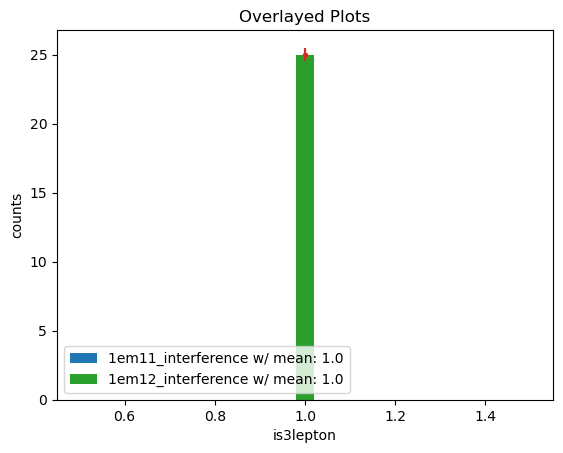

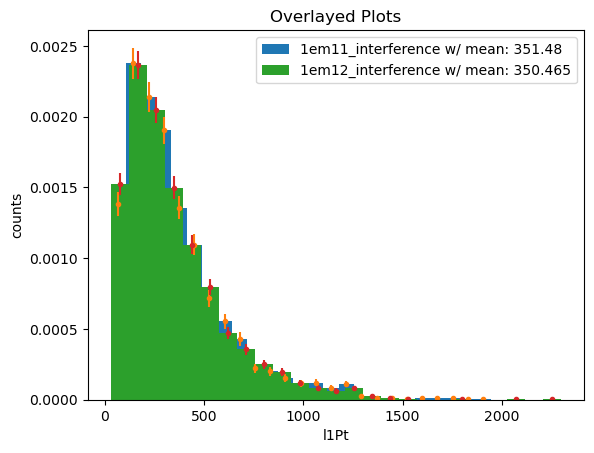

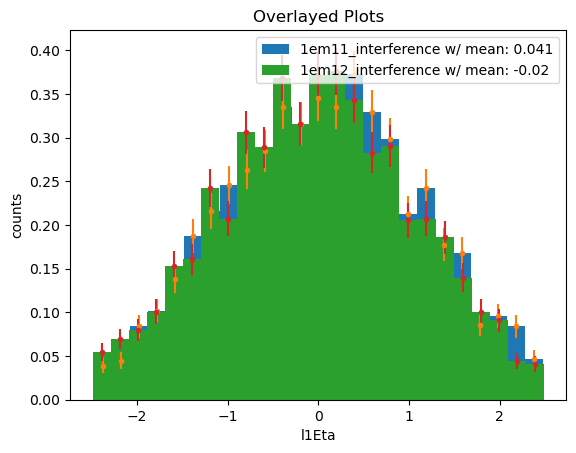

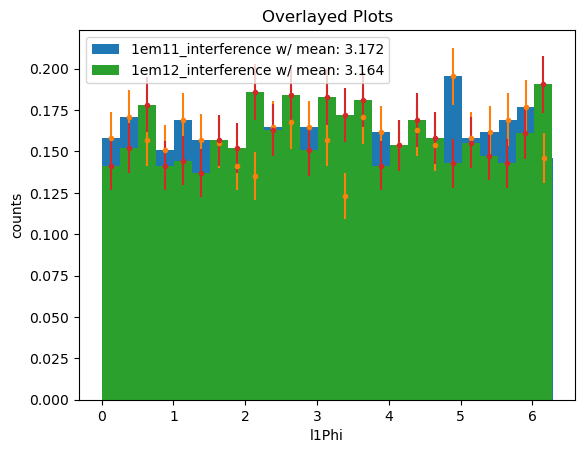

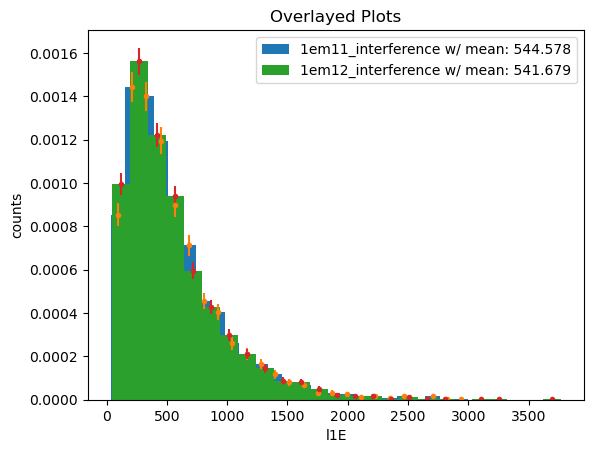

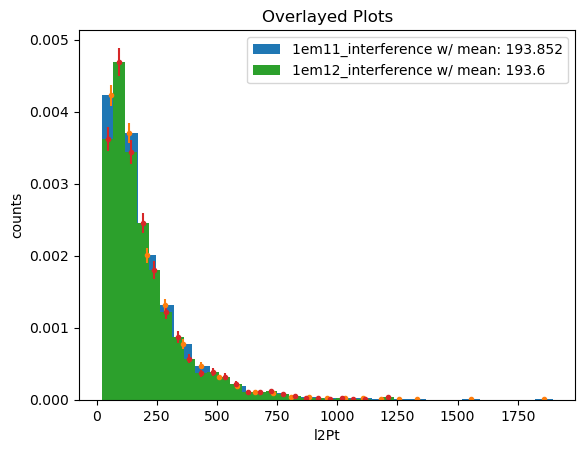

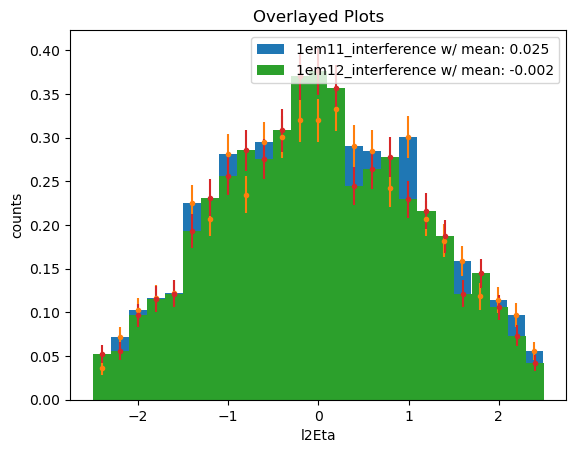

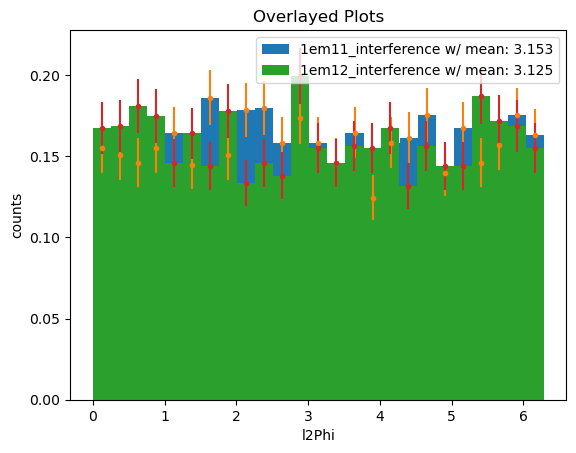

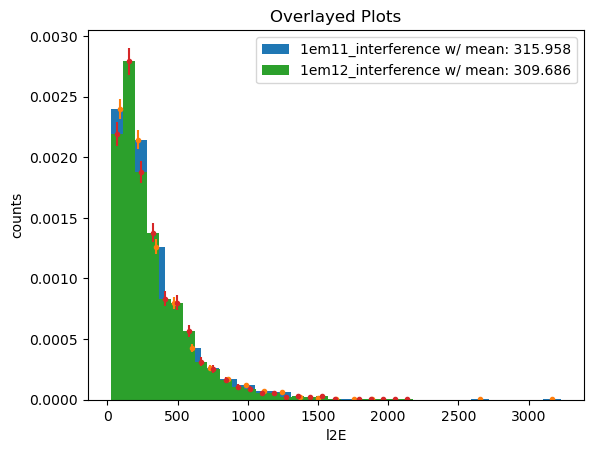

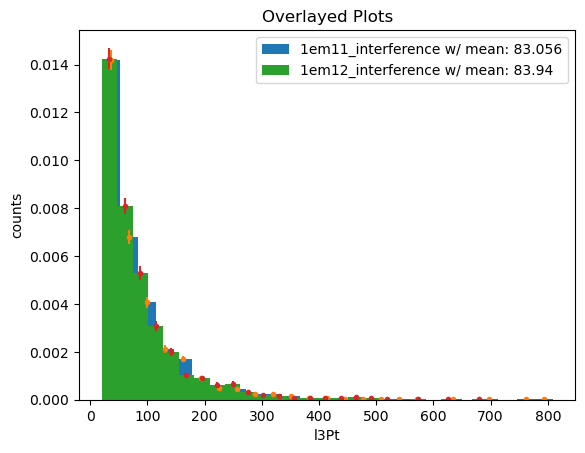

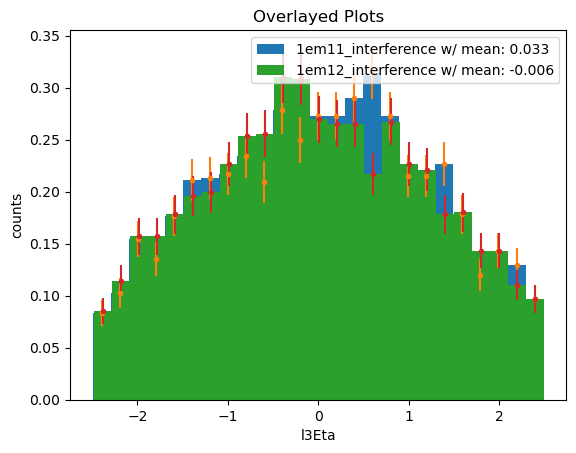

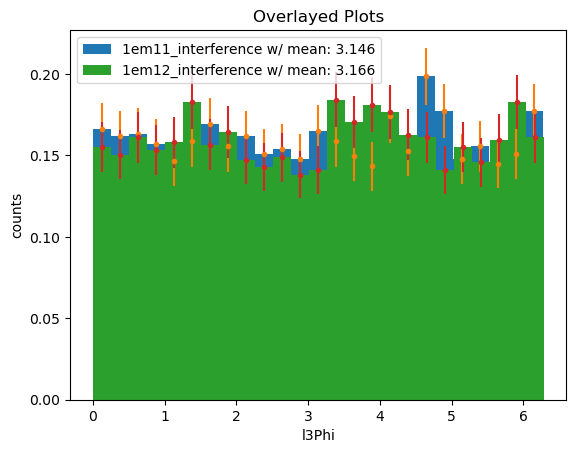

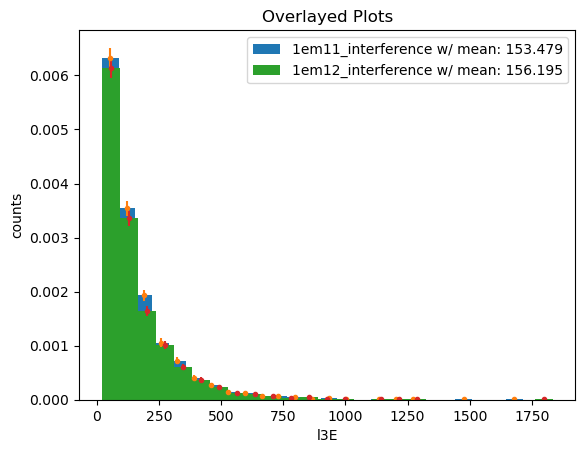

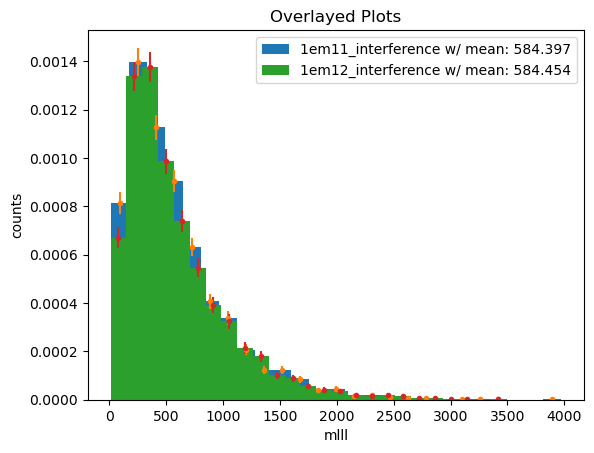

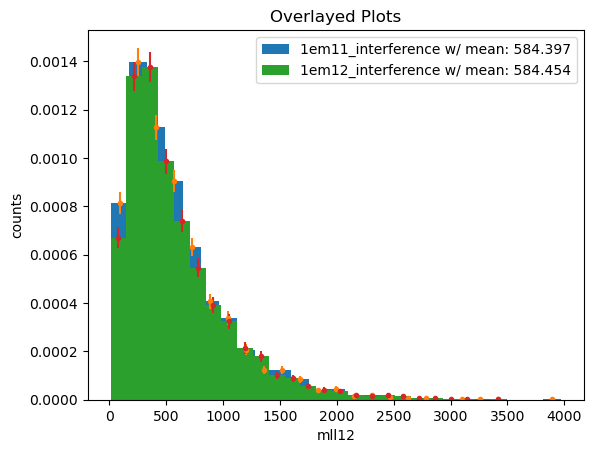

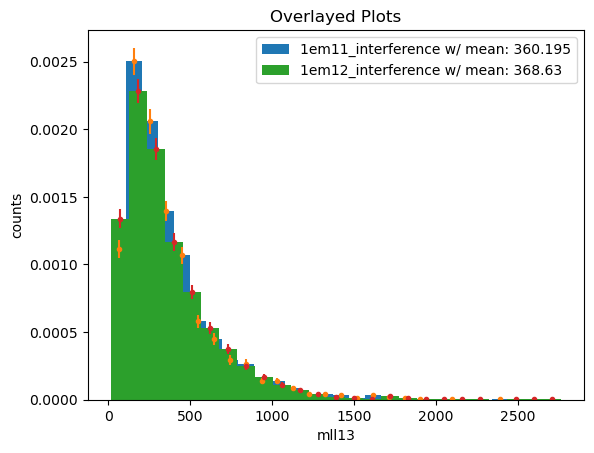

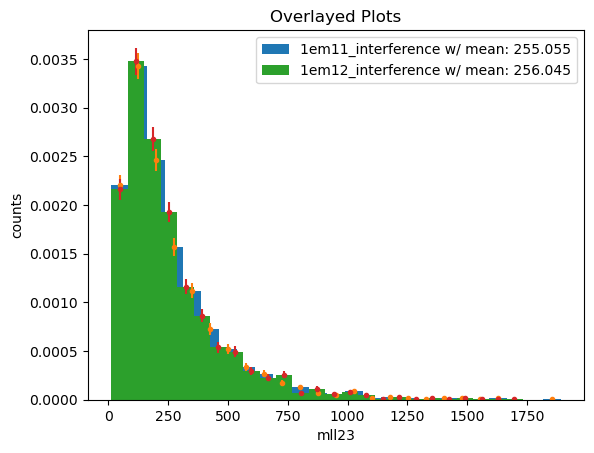

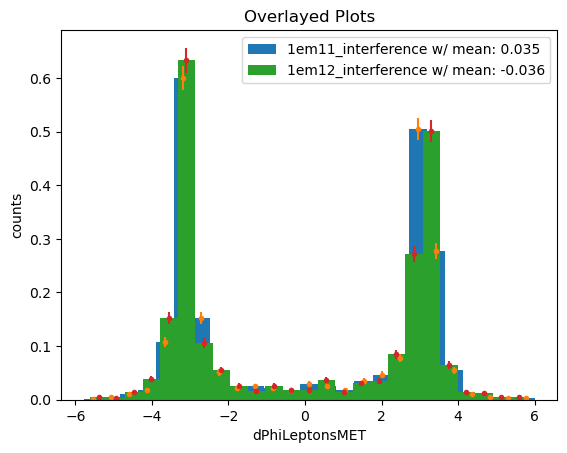

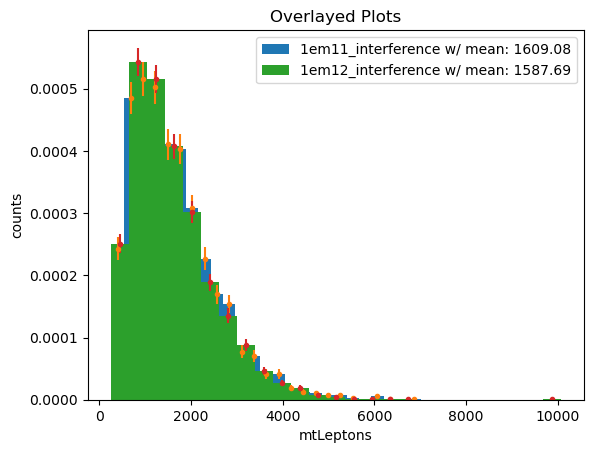

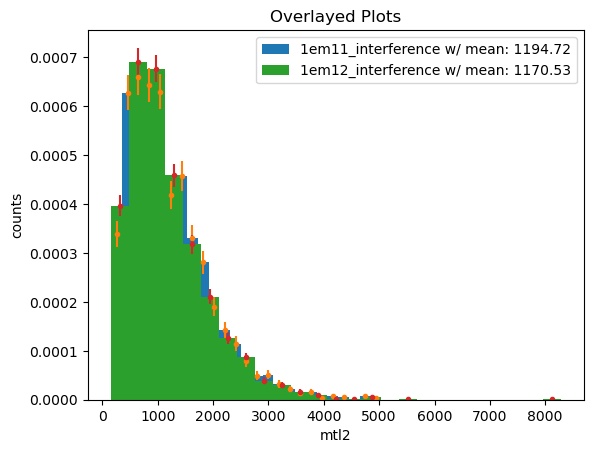

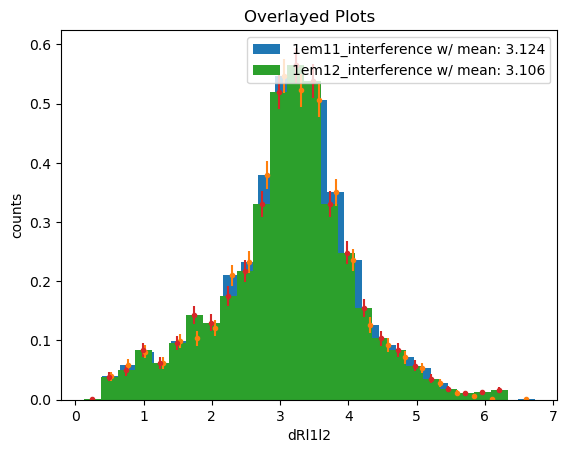

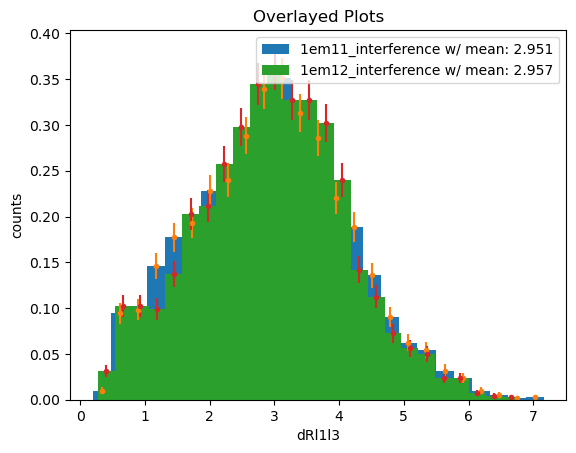

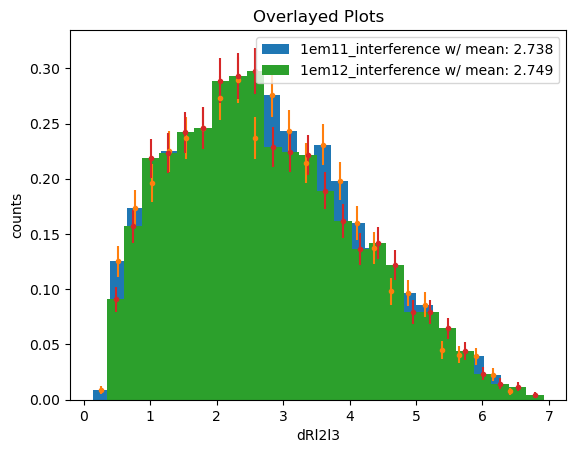

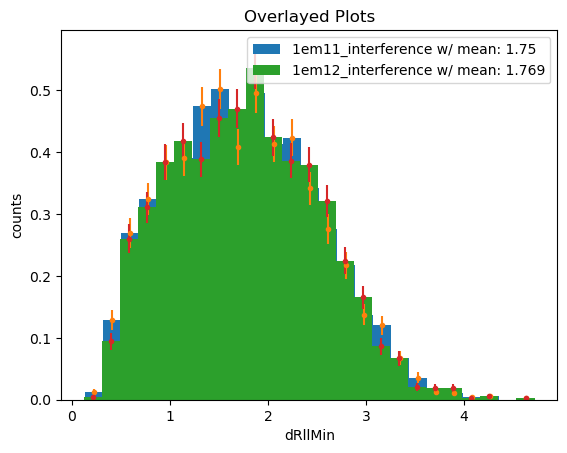

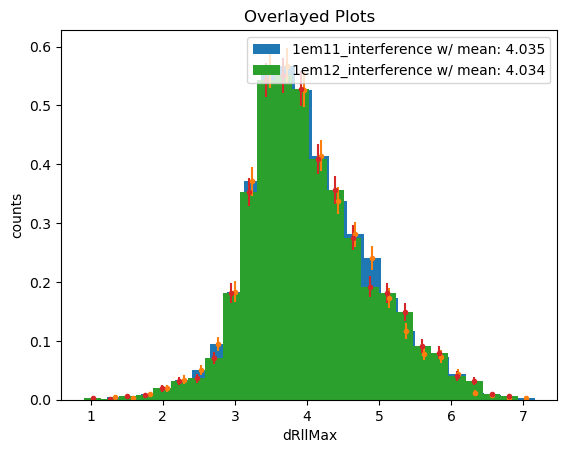

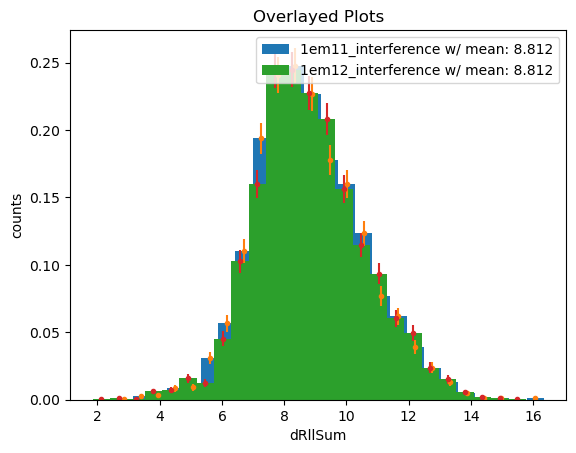

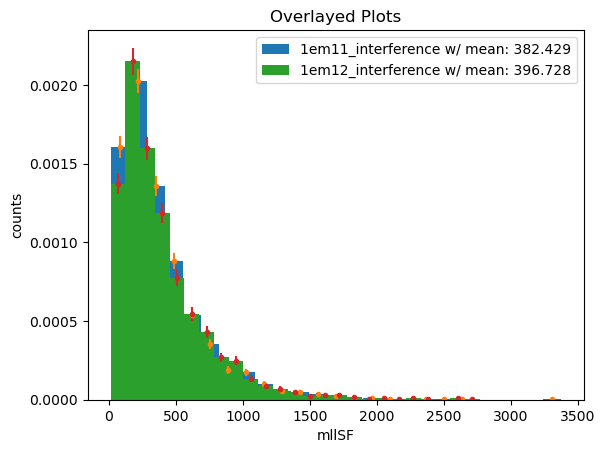

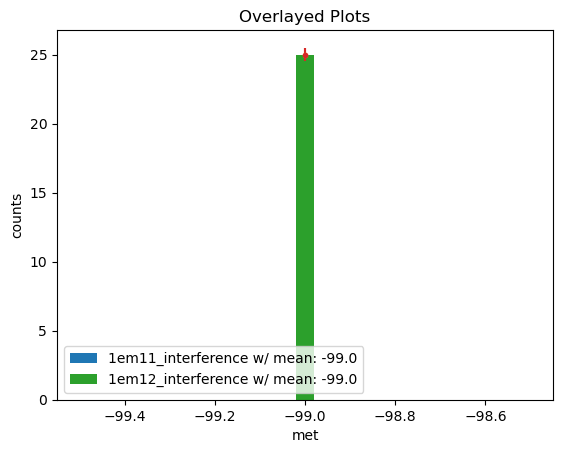

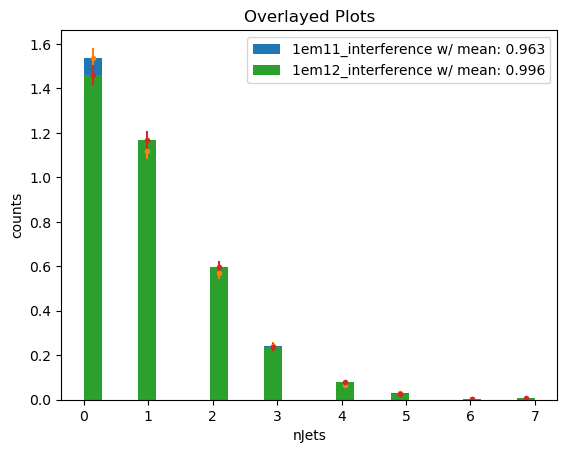

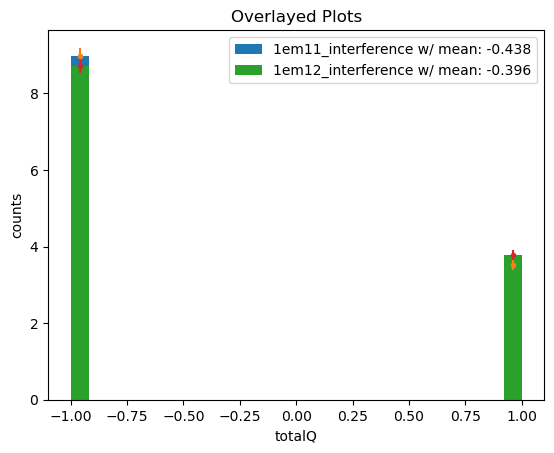

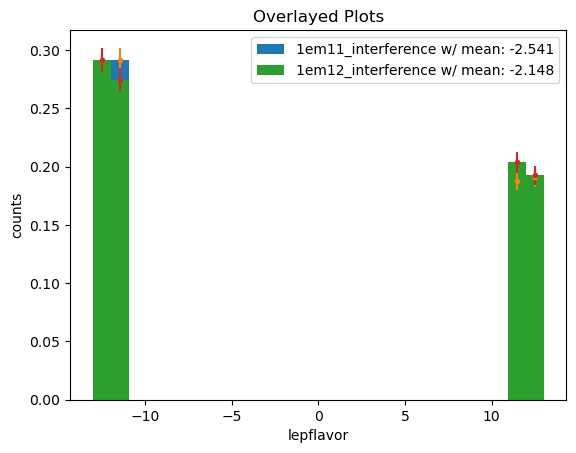

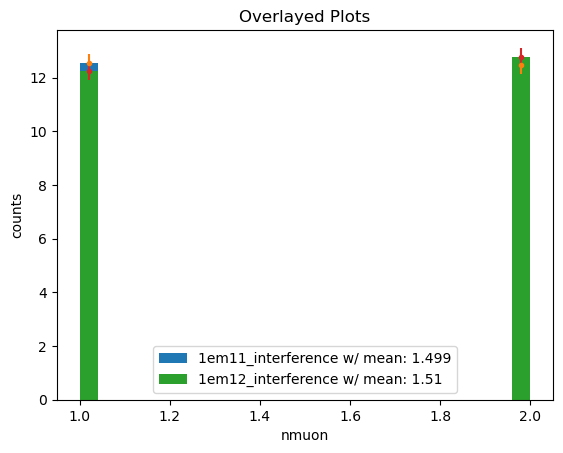

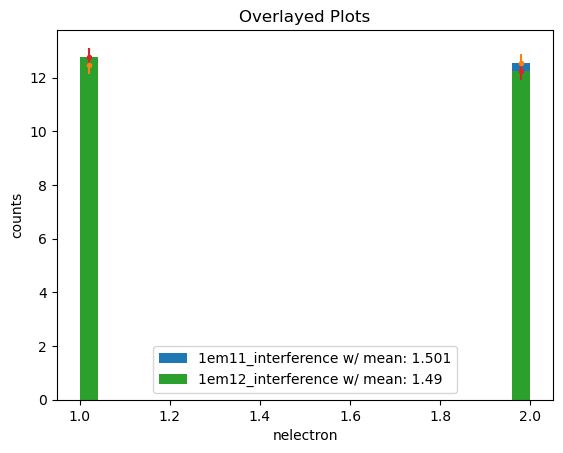

In [372]:
#pure aQGC (comparing 1em11 and 1em12)
for col in cols:
    files = ["1em11_interference.csv","1em12_interference.csv"]
    graph_files(files, col)